# Coleta de dados

Inicialmente, precisamos coletar os nossos dados para dar início ao projeto

Importando bibliotecas

In [1]:
from google.colab import drive                                                                                                                                                                                               #1
drive.mount('/content/drive')
import pandas as pd                                                                                                                                                                                                          #2
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import scipy
import time

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Foram baixadas as bases de dados de [2020](https://drive.google.com/file/d/1nkhD-aCXKzLkT8JCpVjtGBCktFD0Q2wj/view?usp=sharing)
, [2021](https://drive.google.com/file/d/1z5yZTnunmLRK9wiSDdJU9g8A_0QmlHU9/view?usp=sharing)
 e [2022](https://drive.google.com/file/d/1km2OSbC1Kby5cmnyvw9zOoq7BmKphuV8/view?usp=sharing)
  do site do [datasus](https://datasus.saude.gov.br/)  das pessoas com síndrome respiratória aguda grave no brasil

Vamos começar analizando como está estruturado o dataset e que tipo de informações temos nele.

Inicialmente analizaremos o dataset de 2020

In [2]:
df20 = pd.read_csv('/content/drive/MyDrive/BasesSUS/base-2020.csv',error_bad_lines=False,sep = ';')                                                                                                                          #6
print("\ninformações")
df20.head(10)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (15,59,61,62,63,91,93,105,114,116,117,118,122) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)



informações


,DT_NOTIFIC,SEM_NOT,DT_SIN_PRI,SEM_PRI,SG_UF_NOT,ID_REGIONA,CO_REGIONA,ID_MUNICIP,CO_MUN_NOT,ID_UNIDADE,...,DS_AN_OUT,TP_AM_SOR,SOR_OUT,DT_CO_SOR,TP_SOR,OUT_SOR,DT_RES,RES_IGG,RES_IGM,RES_IGA
0,10/01/2020,2,07/01/2020,2,DF,NaN,NaN,BRASILIA,530010,HOSPITAL MATERNO INFANTIL DR ANTONIO LISBOA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,07/01/2020,2,03/01/2020,1,DF,NaN,NaN,BRASILIA,530010,HRT HOSPITAL REGIONAL DE TAGUATINGA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,13/02/2020,7,08/02/2020,6,SP,GVE XXXI SOROCABA,1353.0,SALTO,354520,HOSPITAL E MATERNIDADE MUNICIPAL N S DO MONTE ...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,27/01/2020,5,26/01/2020,5,CE,1 CRES FORTALEZA,1519.0,FORTALEZA,230440,HIAS HOSPITAL INFANTIL ALBERT SABIN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,16/01/2020,3,10/01/2020,2,SP,GVE XXXIII TAUBATE,1352.0,TAUBATE,355410,HOSPITAL REGIONAL DO VALE DO PARAIBA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,26/02/2020,9,24/02/2020,9,SP,GVE VII SANTO ANDRE,1332.0,MAUA,352940,SANTA CASA DE MAUA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,4.0,4.0
6,09/03/2020,11,05/03/2020,10,PR,02RS METROPOLITANA,1356.0,CURITIBA,410690,CENTRO MEDICO COMUNITARIO BAIRRO NOVO,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,12/03/2020,11,10/03/2020,11,MG,UBERABA,1461.0,UBERABA,317010,CLINICAS INTEGRADAS HOSPITAL UNIVERSITARIO MAR...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,12/03/2020,11,25/02/2020,9,DF,NaN,NaN,BRASILIA,530010,HRPL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,22/03/2020,13,21/03/2020,12,SP,GVE XXIX SAO JOSE DO RIO PRETO,1354.0,CATANDUVA,351110,HOSP ESCOLA EMILIO CARLOS CATANDUVA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Pré processamento dos dados

Temos 153 colunas, podemos lista-las para saber exaramente o que são.
A descrição de cada um desses parâmetros encontra-se [neste link](https://s3.sa-east-1.amazonaws.com/ckan.saude.gov.br/SRAG/pdfs/dicionario_de_dados_srag_hosp_17_02_2022.pdf)

In [3]:
for col_escolhida in [ 'DOSE_1_COV' , 'DOSE_2_COV' , 'DOSE_REF']:                                                                                                                       #7
    print(col_escolhida,end = " ")
    if col_escolhida in df20.columns: print("está na base de 2020")
    else:
        print("não está na base de 2020")
        df20[col_escolhida] = np.NaN

DOSE_1_COV não está na base de 2020
DOSE_2_COV não está na base de 2020
DOSE_REF não está na base de 2020


Neste projeto quero identificar quais parâmetros são mais relevantes na chance de uma pessoa sobreviver ou não caso ela pegue covid, portanto selecionarei apenas algumas dessas colunas, as que considerei mais interessantes para ser feita a análise.

In [4]:
colunas_selecionadas = [                                                                                                                                                                                                       #5
    "NU_IDADE_N",
    "FATOR_RISC",   # fatores de risco    
    "CARDIOPATI",   # fatores de risco  
    "ASMA",         # fatores de risco 
    "PNEUMOPATI",   # fatores de risco         
    "DIABETES",     # fatores de risco       
    "IMUNODEPRE",   # fatores de risco         
    "OBESIDADE",    # fatores de risco        
    "OBES_IMC",     # fatores de risco       

    "VACINA_COV",   # 1 = vacinado, 2 = nao vacinado
    "VACINA",       # vacina gripe    

    "DT_SIN_PRI",   # datas    
    "DT_NOTIFIC",   # datas    
    "DT_NASC",      # datas 
    "DOSE_1_COV",   # datas    
    "DOSE_2_COV" ,  # datas    
    "DOSE_REF",     # datas 
    "DT_UT_DOSE",   # datas   
    "DT_INTERNA",   # datas   
    "DT_ENTUTI",    # datas  
    "DT_SAIDUTI",   # datas 
    "DT_EVOLUCA",   # datas    

    "UTI",
    "HOSPITAL",     # internados   

    "EVOLUCAO",     # 1 = cura, 2 = obito, 3 = outras causas obito
    "CLASSI_FIN",   # 5 = covid    
    "TOMO_RES",     # covid
    "RES_AN",       # 1 = covid
    "PCR_RESUL",    # 1 = covid
    "PCR_SARS2",    #
    "POS_AN_FLU",   # influenza
    "RES_IGG",      # covid
    "RES_IGM",      # covid
    "RES_IGA",      # covid
 
    "SEM_NOT",      #Semana Epidemiológica do preenchimento da ficha de notificação
    "SEM_PRI",      #Semana Epidemiológica dos Primeiros Sintomas
    
]

Precisamos preencher os campos que não estão presentes na base de dados de 2020 para que fiquem compatíveis com a integração na base de 2021 e 2022

In [5]:
df20["VACINA_COV"] = 2

In [6]:
def print_range(df):                                                                                                                                                                                                         #4
    print(pd.to_datetime(df["DT_NOTIFIC"]).min(), pd.to_datetime(df["DT_NOTIFIC"]).max())

In [7]:
print("primeira e última datas:")                                                                                                                                                                                            #8
print_range(df20)
print("\npessoas que notificaram depois de 17/01/2021:",end=" ")
depois20 = df20[pd.to_datetime(df20["DT_NOTIFIC"]) > pd.to_datetime("31/12/2020",dayfirst = True)].shape[0]
print(depois20)
total20 = df20.shape[0]
print("tamanho total da base:                      ", total20,)
print("% de pessoas que notificaram depois de 2020:",round(100*depois20/total20,2))

primeira e última datas:
2019-12-29 00:00:00 2022-12-03 00:00:00

pessoas que notificaram depois de 17/01/2021: 57518
tamanho total da base:                       1199992
% de pessoas que notificaram depois de 2020: 4.79


Agora vamos ignorar as colunas que não foram selecionadas

In [8]:
df20 = df20[colunas_selecionadas]

# Integração de dados

Será então feita a união entre as 3 databases (2020, 2021 e 2022)

In [9]:
df21 = pd.read_csv('/content/drive/MyDrive/BasesSUS/base-2021.csv',error_bad_lines=False,sep = ';')                                                                                                                         #10
print("-"*100)
print("df21")
print_range(df21)
df21 = df21[colunas_selecionadas]
df = df20.append(df21, ignore_index=True)

# liberar memória
del df20
del df21

print("-"*100)


df22 = pd.read_csv('/content/drive/MyDrive/BasesSUS/base-2022.csv',error_bad_lines=False,sep = ';')
print("-"*100)
print("df22")
print_range(df22)
df22 = df22[colunas_selecionadas]



df = df  .append(df22,ignore_index = True)
print("-"*100)

del df22

print("df")
print_range(df)

print("-"*100)
print(df.info())
df.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (15,59,61,62,63,91,93,105,107,114,116,117,118,122,143) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


----------------------------------------------------------------------------------------------------
df21
2021-01-02 00:00:00 2022-12-03 00:00:00
----------------------------------------------------------------------------------------------------


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (15,59,61,62,63,66,91,93,107,143) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


----------------------------------------------------------------------------------------------------
df22
2022-01-02 00:00:00 2022-12-03 00:00:00
----------------------------------------------------------------------------------------------------
df
2019-12-29 00:00:00 2022-12-03 00:00:00
----------------------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3107773 entries, 0 to 3107772
Data columns (total 36 columns):
 #   Column      Dtype  
---  ------      -----  
 0   NU_IDADE_N  int64  
 1   FATOR_RISC  object 
 2   CARDIOPATI  float64
 3   ASMA        float64
 4   PNEUMOPATI  float64
 5   DIABETES    float64
 6   IMUNODEPRE  float64
 7   OBESIDADE   float64
 8   OBES_IMC    object 
 9   VACINA_COV  float64
 10  VACINA      float64
 11  DT_SIN_PRI  object 
 12  DT_NOTIFIC  object 
 13  DT_NASC     object 
 14  DOSE_1_COV  object 
 15  DOSE_2_COV  object 
 16  DOSE_REF    object 
 17  DT_UT_DOSE  obje

,NU_IDADE_N,FATOR_RISC,CARDIOPATI,ASMA,PNEUMOPATI,DIABETES,IMUNODEPRE,OBESIDADE,OBES_IMC,VACINA_COV,...,TOMO_RES,RES_AN,PCR_RESUL,PCR_SARS2,POS_AN_FLU,RES_IGG,RES_IGM,RES_IGA,SEM_NOT,SEM_PRI
0,7,S,NaN,NaN,1.0,NaN,1.0,NaN,NaN,2.0,...,NaN,4.0,1.0,NaN,NaN,NaN,NaN,NaN,2,2
1,1,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,1
2,57,S,1.0,2.0,2.0,1.0,2.0,2.0,NaN,2.0,...,NaN,5.0,2.0,NaN,NaN,NaN,NaN,NaN,7,6
3,9,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,...,NaN,4.0,1.0,NaN,NaN,NaN,NaN,NaN,5,5
4,1,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,...,NaN,5.0,1.0,NaN,NaN,NaN,NaN,NaN,3,2


Agora que temos o dataframe com os dados dos 3 anos completos podemos começar a tratar os dados

# Tratamento dos dados

Foi observado que algumas pessoas tomaram a vacina porém não estão marcadas no campo VACINA_COV, portanto precisamos corrigir esse campo para essas pessoas

In [10]:
tomou_alguma =  (pd.isnull(df.DOSE_1_COV) == False ) |(pd.isnull(df.DOSE_2_COV) == False ) | (pd.isnull(df.DOSE_REF) == False )
df_vacina_nao_reg = df[ tomou_alguma][ (pd.isnull(df.VACINA_COV)) | (df.VACINA_COV == 2) | ( df.VACINA_COV == 9) ] # vacina nao preenchida

print("vacinados sem campo de vacinação")
df_vacina_nao_reg[["DOSE_1_COV","DOSE_2_COV","DOSE_REF", "VACINA_COV","NU_IDADE_N","EVOLUCAO","CLASSI_FIN"]]

vacinados sem campo de vacinação


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,DOSE_1_COV,DOSE_2_COV,DOSE_REF,VACINA_COV,NU_IDADE_N,EVOLUCAO,CLASSI_FIN
1201166,25/03/2021,23/04/2021,NaN,NaN,69,1.0,5.0
1201268,09/02/2021,07/03/2021,NaN,NaN,83,2.0,4.0
1202844,08/03/2021,01/04/2021,NaN,2.0,79,2.0,4.0
1202849,23/05/2021,NaN,NaN,2.0,73,1.0,4.0
1203954,18/03/2021,11/04/2021,NaN,9.0,73,1.0,4.0
...,...,...,...,...,...,...,...
3099111,08/03/2021,13/04/2021,NaN,9.0,81,2.0,5.0
3101893,07/12/2021,29/03/2021,19/05/2021,2.0,54,1.0,5.0
3102381,08/10/2021,09/11/2021,NaN,9.0,13,1.0,4.0
3105319,23/09/2021,02/12/2021,NaN,2.0,18,2.0,5.0


In [11]:
df["VACINA_COV"] =  (
  # tomou alguma dose ou já estava marcado que tomou a vacina
  ( pd.isnull(df["DOSE_1_COV"]) == False ) | 
  ( pd.isnull(df["DOSE_2_COV"]) == False ) | 
  ( pd.isnull(df["DOSE_REF"]) == False ) | 
  (df["VACINA_COV"] == 1)) + 9 * (
  # não tomou nenhuma dose e o campo não foi preenchido
  ( pd.isnull(df["DOSE_1_COV"])) & 
  ( pd.isnull(df["DOSE_2_COV"])) & 
  ( pd.isnull(df["DOSE_REF"])) & 
  (( pd.isnull( df["VACINA_COV"])) | (df["VACINA_COV"] == 9) ) ) + (
  # não tomou nenhuma dose e o campo foi preenchido como não tomou
  ( pd.isnull(df["DOSE_1_COV"])) &  
  ( pd.isnull(df["DOSE_2_COV"])) & 
  ( pd.isnull(df["DOSE_REF"])) & 
  # ( pd.isnull(df["VACINA_COV"]) == False ) & (df["VACINA_COV"] == 2))*2 
  (df["VACINA_COV"] == 2))*2   

Podemos então conferir que não há mais nenhum outro possível valor nessas colunas

In [12]:
print(df['VACINA_COV'].drop_duplicates())

0          2
1199992    9
1200011    1
Name: VACINA_COV, dtype: int64


Checamos agora as datas para ver se há algo fora do comum. Para isso precisamos converter as colunas de data para datetime caso já não estejam


In [13]:
df.dtypes

NU_IDADE_N      int64
FATOR_RISC     object
CARDIOPATI    float64
ASMA          float64
PNEUMOPATI    float64
DIABETES      float64
IMUNODEPRE    float64
OBESIDADE     float64
OBES_IMC       object
VACINA_COV      int64
VACINA        float64
DT_SIN_PRI     object
DT_NOTIFIC     object
DT_NASC        object
DOSE_1_COV     object
DOSE_2_COV     object
DOSE_REF       object
DT_UT_DOSE     object
DT_INTERNA     object
DT_ENTUTI      object
DT_SAIDUTI     object
DT_EVOLUCA     object
UTI           float64
HOSPITAL      float64
EVOLUCAO      float64
CLASSI_FIN    float64
TOMO_RES      float64
RES_AN        float64
PCR_RESUL     float64
PCR_SARS2     float64
POS_AN_FLU    float64
RES_IGG       float64
RES_IGM       float64
RES_IGA       float64
SEM_NOT         int64
SEM_PRI         int64
dtype: object

Nesse exemplo podemos observar algumas datas absurdas que ainda não aconteceram ou que foram de antes de 2020, o que não faz sentido já que a base de dados é a partir de 2020

In [14]:
cols_datas_erradas = ["DOSE_1_COV","DOSE_2_COV","DT_ENTUTI","DT_INTERNA"]

In [15]:
df_dt_erro = pd.DataFrame()

In [16]:
for col in cols_datas_erradas:
  print("_"*25,"\n")
  print(col)
  nome_col_ano = "ANO_" + col
  df[nome_col_ano] = df[col].str.split('/').str[2]  # pega ano

  print("N° de NaN:",df[nome_col_ano][pd.isnull(df[nome_col_ano]) == True].shape[0]) 
  
  # Convertendo casos com datas corretas 
  correto = df[nome_col_ano][pd.isnull(df[nome_col_ano]) == False].between('2020','2022')
  
  errado =     correto == False   # pegar os errados
  df_dt_erro_especifico = df[pd.isnull(df[nome_col_ano]) == False][errado]
  df_dt_erro = df_dt_erro.append(df_dt_erro_especifico, ignore_index=True) 

  df[col] = pd.to_datetime(df[col][pd.isnull(df[nome_col_ano]) == False][correto],dayfirst = True)
  print(df_dt_erro_especifico[col].loc[:])
  print()

_________________________ 

DOSE_1_COV
N° de NaN: 2694808
1218029    30/04/8202
1234467    26/05/2121
1237383    27/05/1921
1247183    07/03/2011
1257610    28/02/8202
              ...    
3052452    22/01/2202
3062305    03/03/3021
3079103    01/03/2032
3082864    10/09/2023
3105819    25/01/3021
Name: DOSE_1_COV, Length: 118, dtype: object

_________________________ 

DOSE_2_COV
N° de NaN: 2817445
1203560    06/04/2002
1243096    25/04/2201
1264331    13/05/4202
1279295    24/04/2024
1298811    29/04/2029
              ...    
3083370    27/04/2121
3088151    27/04/2027
3091200    24/05/5202
3095575    08/07/2121
3100094    03/12/2011
Name: DOSE_2_COV, Length: 134, dtype: object

_________________________ 

DT_ENTUTI
N° de NaN: 2236404
57001      27/11/2019
70776      05/11/2019
107930     30/12/2019
115788     18/07/2019
145458     29/12/2019
213241     30/12/2019
269194     29/12/2019
309104     05/12/2019
398547     30/12/2019
487835     19/11/2929
506178     02/08/2220
520433   

# Definição de tipos

Agora transformaremos as colunas de data em datetime realmente para que possam ser utilizados métodos de data

In [17]:
datas = [
    "DT_SIN_PRI",
    "DT_NOTIFIC",
    "DOSE_1_COV",
    "DOSE_2_COV" ,
    "DOSE_REF",
    "DT_UT_DOSE",
    "DT_INTERNA",
    "DT_ENTUTI",
    "DT_SAIDUTI",
    "DT_EVOLUCA",
    "DT_NASC"
    ]

In [18]:
df.DT_SIN_PRI   = pd.to_datetime(df.DT_SIN_PRI,dayfirst = True)
df.DT_NOTIFIC   = pd.to_datetime(df.DT_NOTIFIC,dayfirst = True)
df.DT_NASC      = pd.to_datetime(df.DT_NASC   ,dayfirst = True)
#df.DOSE_1_COV   = pd.to_datetime(df.DOSE_1_COV,dayfirst = True)
#df.DOSE_2_COV   = pd.to_datetime(df.DOSE_2_COV,dayfirst = True)
df.DOSE_REF     = pd.to_datetime(df.DOSE_REF  ,dayfirst = True)
df.DT_UT_DOSE   = pd.to_datetime(df.DT_UT_DOSE,dayfirst = True)
#df.DT_INTERNA   = pd.to_datetime(df.DT_INTERNA,dayfirst = True) 
#df.DT_ENTUTI    = pd.to_datetime(df.DT_ENTUTI ,dayfirst = True) 
df.DT_SAIDUTI   = pd.to_datetime(df.DT_SAIDUTI,dayfirst = True)
df.DT_EVOLUCA   = pd.to_datetime(df.DT_EVOLUCA,dayfirst = True)


Definirei as datas mínima e máxima de acordo com os dados, não faz sentido termos datas antes de 2020 pois pegamos a base de dados a partir deste ano, e não faz sentido ter uma data maior que essa máxima pois foi quando baixei a base de dados.

In [19]:
DATA_MAXIMA = pd.to_datetime("24/03/2022",dayfirst = True)
DATA_MINIMA =  pd.to_datetime('01/01/2020',dayfirst = True)

Como é possivel observar, existem vários dados futuros no dataframe

In [20]:
for data in datas:
    df_futuro = df[[data,"NU_IDADE_N"]][ df[data] > pd.to_datetime("24/03/2022",dayfirst = True)].sort_values(by = data)
    print(df[[data,"NU_IDADE_N"]][ df[data] > DATA_MAXIMA].sort_values(by = data))
    df_dt_erro = df_dt_erro.append(df_futuro,ignore_index = True)
    

Empty DataFrame
Columns: [DT_SIN_PRI, NU_IDADE_N]
Index: []
Empty DataFrame
Columns: [DT_NOTIFIC, NU_IDADE_N]
Index: []
        DOSE_1_COV  NU_IDADE_N
3041417 2022-03-25          78
3074534 2022-03-25          80
2938662 2022-03-25          70
3049517 2022-03-25          80
3038175 2022-03-25          71
...            ...         ...
2258775 2022-11-16          52
3007568 2022-11-25          33
3087279 2022-12-01          72
3029846 2022-12-08          15
3039870 2022-12-10          21

[280 rows x 2 columns]
        DOSE_2_COV  NU_IDADE_N
2968812 2022-03-25          87
3001499 2022-03-25          81
2924530 2022-03-25          80
3021573 2022-03-26          85
3003890 2022-03-26          73
...            ...         ...
3021227 2022-12-09          87
2942688 2022-12-17          44
3050355 2022-12-20          14
3031290 2022-12-21          80
3093669 2022-12-31          75

[442 rows x 2 columns]
          DOSE_REF  NU_IDADE_N
3030179 2022-04-12          51
2026350 2022-06-21        

É checado então se as datas absurdas foram removidas

In [21]:
for data in datas[:-1]:
    print(data)

    print("datas absurdas: \n",df[(df[data] > DATA_MAXIMA) | (df[data] < DATA_MINIMA)][data])

    fora_do_intervalo_limite_superior = df.index[(df[data] > DATA_MAXIMA)]
    df_dt_erro.append(df.loc[fora_do_intervalo_limite_superior],ignore_index = True)
    df.drop(index = fora_do_intervalo_limite_superior, inplace = True)

    fora_do_intervalo_limite_inferior = df.index[(df[data] < DATA_MINIMA)]
    df_dt_erro.append(df.loc[fora_do_intervalo_limite_inferior],ignore_index = True)
    df.drop(index = fora_do_intervalo_limite_inferior, inplace = True)

    print(
    "N° datas absurdas após limpeza: \n",
    df[(df[data] > DATA_MAXIMA) | (df[data] < DATA_MINIMA)][data].shape[0]
    )
    print("-"*30)

data = datas[-1]
print(data)
print("datas absurdas: \n",df[df[data] > DATA_MAXIMA ][data])
fora_do_intervalo_limite_superior = df.index[(df[data] > DATA_MAXIMA)]
df_dt_erro.append(df.loc[fora_do_intervalo_limite_superior],ignore_index = True)
df.drop(index = fora_do_intervalo_limite_superior, inplace = True)

print(
"N° datas absurdas após limpeza: \n",
df[df[data] > DATA_MAXIMA][data].shape[0]
)

DT_SIN_PRI
datas absurdas: 
 13381     2019-12-31
32217     2019-12-30
46117     2019-12-31
61013     2019-12-29
102491    2019-12-30
             ...    
1161947   2019-12-29
1171356   2019-12-31
1171358   2019-12-31
1183439   2019-12-29
1185057   2019-12-31
Name: DT_SIN_PRI, Length: 144, dtype: datetime64[ns]
N° datas absurdas após limpeza: 
 0
------------------------------
DT_NOTIFIC
datas absurdas: 
 Series([], Name: DT_NOTIFIC, dtype: datetime64[ns])
N° datas absurdas após limpeza: 
 0
------------------------------
DOSE_1_COV
datas absurdas: 
 1499189   2022-04-24
1540664   2022-06-15
1572802   2022-06-01
1597784   2022-05-03
1599433   2022-07-13
             ...    
3105441   2022-04-13
3105482   2022-04-16
3105821   2022-05-13
3105827   2022-05-27
3105875   2022-05-12
Name: DOSE_1_COV, Length: 280, dtype: datetime64[ns]
N° datas absurdas após limpeza: 
 0
------------------------------
DOSE_2_COV
datas absurdas: 
 1205615   2022-04-23
1322862   2022-08-17
1369100   2022-07-30


Agora será checada a ordem cronológica dos dados, por exemplo pessoas que entraram na uti depois de asir ou pessoas que tomaram a vacina antes de nascer

In [22]:
print("N° casos que entraram na UTI depois de sair:",len(df[["DT_ENTUTI","DT_SAIDUTI"]][df["DT_ENTUTI"] > df["DT_SAIDUTI"]]))
print("N° casos que entraram na UTI antes da internação:",len(df[["DT_ENTUTI","DT_INTERNA",]][df["DT_ENTUTI"] < df["DT_INTERNA"]]))
print("N° casos que tomou 1° dose antes da 2°:",len(df[["DOSE_1_COV","DOSE_2_COV","DOSE_REF"]][ df["DOSE_1_COV"] > df["DOSE_2_COV"]]))
print("N° casos que tomou 2° dose antes da reforço:",len(df[["DOSE_1_COV","DOSE_2_COV","DOSE_REF"]][df["DOSE_2_COV"] > df["DOSE_REF"]]))
print("N° casos que primeiros sintomas ocorreram depois da notificação:",len(df[["DT_SIN_PRI","DT_NOTIFIC"]][df["DT_SIN_PRI"] > df["DT_NOTIFIC"]]))
# ver se nascimento ocorre depois de algo:
for data  in datas[:-1]:
    print(f"N° casos com data de nascimento posterior a {data}:",len(df[df["DT_NASC"] > df[data]]))

N° casos que entraram na UTI depois de sair: 0
N° casos que entraram na UTI antes da internação: 0
N° casos que tomou 1° dose antes da 2°: 3691
N° casos que tomou 2° dose antes da reforço: 64
N° casos que primeiros sintomas ocorreram depois da notificação: 0
N° casos com data de nascimento posterior a DT_SIN_PRI: 0
N° casos com data de nascimento posterior a DT_NOTIFIC: 0
N° casos com data de nascimento posterior a DOSE_1_COV: 499
N° casos com data de nascimento posterior a DOSE_2_COV: 410
N° casos com data de nascimento posterior a DOSE_REF: 7
N° casos com data de nascimento posterior a DT_UT_DOSE: 0
N° casos com data de nascimento posterior a DT_INTERNA: 14
N° casos com data de nascimento posterior a DT_ENTUTI: 0
N° casos com data de nascimento posterior a DT_SAIDUTI: 0
N° casos com data de nascimento posterior a DT_EVOLUCA: 0


Pessoas que tomaram a vacina antes de nascer

In [23]:
datasVacina = ["DOSE_1_COV","DOSE_2_COV","DOSE_REF"]
df[datasVacina + ["DT_NASC"]][
                                (df.DT_NASC > df.DOSE_1_COV) 
                                |(df.DT_NASC > df.DOSE_2_COV) 
                                |(df.DT_NASC > df.DOSE_REF) 
                            ].head()

,DOSE_1_COV,DOSE_2_COV,DOSE_REF,DT_NASC
1205510,2021-03-12,2021-04-06,NaT,2021-07-16
1212311,2021-07-07,2021-04-07,NaT,2021-05-06
1212618,2021-06-16,2021-09-18,NaT,2021-12-20
1219342,2021-06-16,2021-09-18,NaT,2021-08-13
1219400,2021-09-02,NaT,NaT,2021-11-10


Pessoas que foram internadas antes de nascer

In [24]:
df[(df.DT_NASC > df.DT_INTERNA)].head()

,NU_IDADE_N,FATOR_RISC,CARDIOPATI,ASMA,PNEUMOPATI,DIABETES,IMUNODEPRE,OBESIDADE,OBES_IMC,VACINA_COV,...,POS_AN_FLU,RES_IGG,RES_IGM,RES_IGA,SEM_NOT,SEM_PRI,ANO_DOSE_1_COV,ANO_DOSE_2_COV,ANO_DT_ENTUTI,ANO_DT_INTERNA
76804,2,S,2.0,2.0,2.0,2.0,2.0,2.0,NaN,2,...,NaN,NaN,NaN,NaN,30,30,NaN,NaN,2020,2020
248770,1,S,NaN,NaN,NaN,NaN,1.0,NaN,NaN,2,...,NaN,NaN,NaN,NaN,42,41,NaN,NaN,NaN,2020
567773,1,S,2.0,2.0,2.0,2.0,2.0,2.0,NaN,2,...,NaN,NaN,NaN,NaN,30,29,NaN,NaN,2020,2020
769936,2,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,...,NaN,NaN,NaN,NaN,51,50,NaN,NaN,2020,2020
945107,0,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,...,NaN,1.0,1.0,NaN,33,32,NaN,NaN,NaN,2020


Pessoas com as doses da vacina fora de ordem

In [25]:
df[["DOSE_1_COV","DOSE_2_COV"]][ df["DOSE_1_COV"] > df["DOSE_2_COV"]]

,DOSE_1_COV,DOSE_2_COV
1200720,2021-09-22,2021-06-04
1201668,2021-03-12,2021-03-09
1204424,2021-08-04,2021-05-27
1204822,2021-03-10,2021-02-10
1204894,2021-04-27,2020-07-23
...,...,...
3107343,2021-05-05,2021-02-28
3107713,2021-06-16,2021-06-04
3107726,2021-07-07,2021-06-04
3107740,2021-07-07,2021-06-04


In [26]:
df[["DOSE_2_COV","DOSE_REF"]][df["DOSE_2_COV"] > df["DOSE_REF"]]

,DOSE_2_COV,DOSE_REF
1245118,2021-09-02,2021-01-31
1260942,2021-10-01,2021-03-09
1287542,2021-09-21,2021-01-26
1317173,2021-09-01,2021-02-21
1431920,2021-11-12,2021-10-15
...,...,...
3076879,2021-09-30,2021-09-28
3086867,2021-09-02,2021-02-21
3100741,2022-01-20,2021-10-29
3105735,2021-03-29,2021-03-25


É então feita a limpeza desses casos 

In [27]:
df_dt_erro_ordem = df[
                        (df.DT_NASC > df.DOSE_1_COV) 
                        |(df.DT_NASC > df.DOSE_2_COV) 
                        |(df.DT_NASC > df.DOSE_REF)
                        |(df.DOSE_2_COV > df.DOSE_REF)
                        |( df.DOSE_1_COV > df.DOSE_2_COV)
                        |(df.DT_NASC > df.DT_INTERNA)
                     ]
df_dt_erro.append(df_dt_erro_ordem,ignore_index = True)
df.drop(index = df_dt_erro_ordem.index,inplace = True)
print("errados (após limpeza):",len(df[
                        (df.DT_NASC > df.DOSE_1_COV) 
                        |(df.DT_NASC > df.DOSE_2_COV) 
                        |(df.DT_NASC > df.DOSE_REF)
                        |(df.DOSE_2_COV > df.DOSE_REF)
                        |( df.DOSE_1_COV > df.DOSE_2_COV)
                        |(df.DT_NASC > df.DT_INTERNA)
                     ]))

errados (após limpeza): 0


In [28]:
df_dt_erro[cols_datas_erradas]

,DOSE_1_COV,DOSE_2_COV,DT_ENTUTI,DT_INTERNA
0,30/04/8202,NaN,NaN,NaN
1,26/05/2121,NaN,NaN,29/03/2021
2,27/05/1921,25/08/2021,NaN,01/04/2021
3,07/03/2011,NaN,19/03/2021,17/03/2021
4,28/02/8202,NaN,NaN,23/08/2021
...,...,...,...,...
1401,NaN,NaN,NaN,NaN
1402,NaN,NaN,NaN,NaN
1403,NaN,NaN,NaN,NaN
1404,NaN,NaN,NaN,NaN


Faremos agora um limite de idade para que não haja ninguém com idade negativa ou absurdamente alta no nossso dataframe. O limite foi em 121 anos pois é a idade da pessoa mais velha do brasil segundo a [revista istoe](https://istoe.com.br/brasileira-de-121-anos-que-mora-na-bahia-pode-ser-a-pessoa-mais-velha-do-mundo/#:~:text=Maria%20Gomes%20dos%20Reis%2C%20uma,informa%C3%A7%C3%B5es%20s%C3%A3o%20do%20portal%20G1.)

In [29]:
idade_maxima = 121
idade_minima =  0

In [30]:
indices = df.index[~df["NU_IDADE_N"].between(idade_minima,idade_maxima) ]
df_quarta_idade = df.loc[indices]

df.drop(index = indices, inplace = True)


In [31]:
def grafico_barra(serie,title=None,ylabel=None,xlabel=None,legend = None,color='b', show = True):                                                                                                                            #3
    plt.figure(figsize=(20, 4)) 
    plt.bar(np.arange(0,serie.size), serie, color = color,
            label=legend)

    if title : plt.title( title)
    if ylabel: plt.ylabel(ylabel)
    if xlabel: plt.xlabel(xlabel)
    if legend: plt.legend()
    if show: plt.show()

In [32]:
def plot_por_idade(filtrado, Npessoas_idade, titulo = '' , titulo_taxa = '', contagem = True, taxa = True,color = 'blue',show = True,return_distributions = True):
    
    filtrado_por_idade = filtrado_taxa = None

    filtrado_por_idade = filtrado[["NU_IDADE_N","DT_NOTIFIC"]].groupby(by="NU_IDADE_N").count() 
    filtrado_por_idade = filtrado_por_idade.rename(columns={"DT_NOTIFIC": "N_pessoas"})["N_pessoas"].to_frame() 

    if contagem:

        plt.figure(figsize=(20, 4));
        plt.bar(filtrado_por_idade.index,filtrado_por_idade.N_pessoas,color = color,)
        if show:
            media_idade = round( filtrado.NU_IDADE_N.mean() , 2)
            std_idade   = round( filtrado.NU_IDADE_N.std()  , 2)
            print(f'Média de idade: {media_idade}')
            print(f'Desvio padrão da idade: {std_idade}')     
            print(f"idades dentro de 1 desvio padrão:   [{media_idade-std_idade}, {media_idade+std_idade}]")
            print(f"idades dentro de 2 desvios padrões: [{media_idade-2*std_idade}, {media_idade+2*std_idade}]")

            plt.title("N° "+ titulo)
            plt.ylabel("N° pessoas")
            plt.xlabel("idade")
            
            plt.show()


    if taxa:
        filtrado_taxa = filtrado_por_idade/Npessoas_idade
        plt.figure(figsize=(20, 4))
        plt.bar(filtrado_taxa.index,filtrado_taxa.N_pessoas,color = color,width=0.4,)
        if show:
               
            plt.title("TAXA " + titulo_taxa)
            
            plt.show()


    print("\n\n")
    if return_distributions:
        return filtrado_por_idade, filtrado_taxa

Podemos então observar como ficou a distribuição das idades

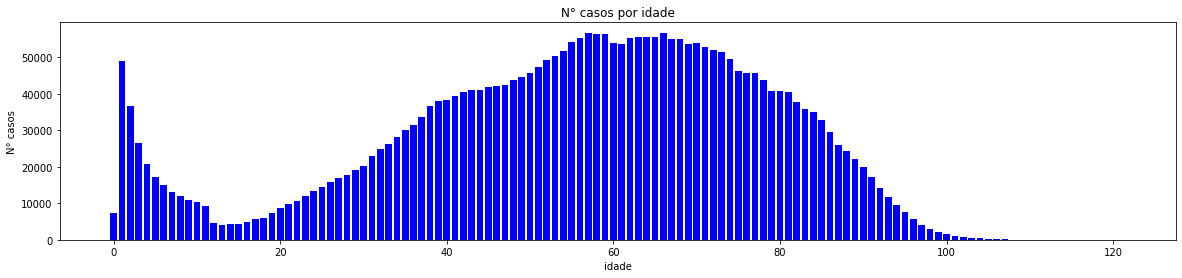

,N_pessoas
NU_IDADE_N,
0,7225
1,48953
2,36803
3,26658
4,20675
...,...
117,6
118,3
119,1


In [33]:
Npessoas_idade = df[["NU_IDADE_N","DT_NOTIFIC"]].groupby(by="NU_IDADE_N").count() 
Npessoas_idade = Npessoas_idade.rename(columns={"DT_NOTIFIC": "N_pessoas"})["N_pessoas"].to_frame() 
grafico_barra(Npessoas_idade.N_pessoas,title = "N° casos por idade",xlabel = "idade",ylabel = "N° casos")
Npessoas_idade

Tinhamos algumas pessoas com idade negativa que foram removidas como podemos ver no gráfico a diante

In [34]:
df_negativa = df_quarta_idade[df_quarta_idade.NU_IDADE_N < 0] 

Média de idade: -3.55
Desvio padrão da idade: 3.21
idades dentro de 1 desvio padrão:   [-6.76, -0.33999999999999986]
idades dentro de 2 desvios padrões: [-9.969999999999999, 2.87]


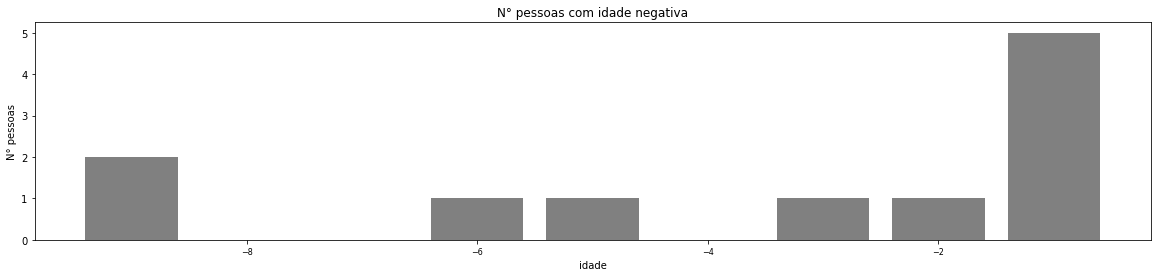

,NU_IDADE_N,DT_NASC,DT_NOTIFIC,DT_SIN_PRI
1575591,-9,2020-12-08,2021-03-16,2021-03-10
2926456,-9,2021-10-02,2022-02-11,2022-01-25
2336456,-6,2021-07-05,2022-01-04,2022-01-01
2794752,-5,2015-08-16,2021-03-27,2021-03-24
542197,-3,2020-02-19,2020-09-30,2020-09-27
2217955,-2,2018-09-05,2021-07-09,2021-07-05
691320,-1,2020-08-02,2020-08-02,2020-08-02
979494,-1,2020-12-12,2020-12-13,2020-12-13
1119076,-1,2020-10-13,2020-11-07,2020-10-28
2362349,-1,2020-02-21,2021-01-26,2021-01-19


In [35]:
plt.rc('xtick',labelsize=8)
plot_por_idade(df_negativa,Npessoas_idade,titulo = f"pessoas com idade negativa",color = 'grey',taxa = False,return_distributions = False)

df_negativa.sort_values(by = "NU_IDADE_N")[["NU_IDADE_N","DT_NASC","DT_NOTIFIC","DT_SIN_PRI"]]

In [36]:
df.append(df_quarta_idade)["NU_IDADE_N"].describe()

count    3.096661e+06
mean     5.502943e+01
std      2.279969e+01
min     -9.000000e+00
25%      4.100000e+01
50%      5.800000e+01
75%      7.200000e+01
max      1.500000e+02
Name: NU_IDADE_N, dtype: float64

aqui vemos a quantidade de pessoas com mais de 120 anos

In [37]:
df_maior120 = df_quarta_idade[df_quarta_idade["NU_IDADE_N"] > 120]

Média de idade: 136.75
Desvio padrão da idade: 7.34
idades dentro de 1 desvio padrão:   [129.41, 144.09]
idades dentro de 2 desvios padrões: [122.07, 151.43]


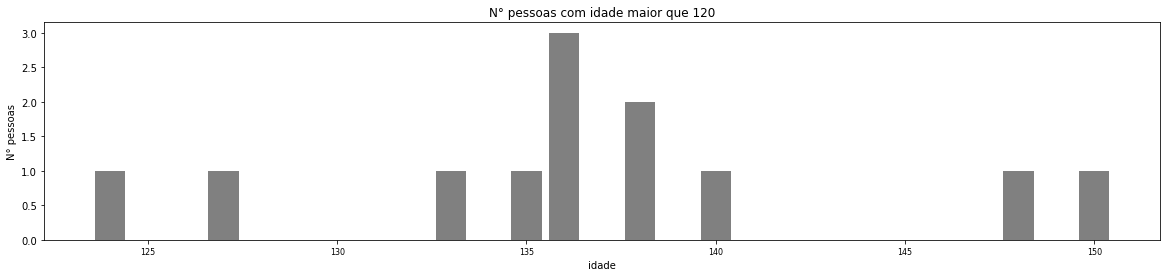

,NU_IDADE_N,DT_NASC,DT_NOTIFIC,DT_SIN_PRI
1605525,124,1897-02-27,2021-08-11,2021-08-07
1548252,127,1893-08-21,2021-05-22,2021-05-20
1124013,133,1887-10-09,2020-11-21,2020-11-16
584907,135,1884-10-28,2020-08-09,2020-08-07
42546,136,1883-08-06,2020-03-29,2020-03-19
1489791,136,1884-07-30,2021-03-26,2021-03-18
2806966,136,1885-05-23,2021-07-16,2021-07-03
15221,138,1882-06-08,2020-06-26,2020-06-20
907281,138,1881-07-15,2020-05-20,2020-05-12
2455690,140,1880-08-10,2021-05-26,2021-02-18


In [38]:
plot_por_idade(df_maior120,Npessoas_idade,titulo = f"pessoas com idade maior que 120",color = 'grey',taxa = False,return_distributions = False)

df_maior120.sort_values(by = "NU_IDADE_N")[["NU_IDADE_N","DT_NASC","DT_NOTIFIC","DT_SIN_PRI"]]

Agora vamos analizar os casos de uti

In [39]:
print("Casos sem status na UTI:",   df[~df['UTI'].between(1,10)]['UTI'].shape[0])
print("Casos sem entrada na UTI:",  df[df['UTI'] == 2]['UTI'].shape[0])
print("Casos com entrada na UTI:",  df[df['UTI'] == 1]['UTI'].shape[0])
print("Casos Ignorados:",            df[df['UTI']== 9]['UTI'].shape[0])
total =  df[~df['UTI'].between(1,10)]['UTI'].shape[0] + df[df['UTI'] == 2]['UTI'].shape[0] + df[df['UTI'] == 1]['UTI'].shape[0] +  df[df['UTI']== 9]['UTI'].shape[0]
print("soma dos casos anteriores:",total)
print("total da base:            ",df.shape[0])

Casos sem status na UTI: 437550
Casos sem entrada na UTI: 1699902
Casos com entrada na UTI: 896023
Casos Ignorados: 63163
soma dos casos anteriores: 3096638
total da base:             3096638


Casos de uti imediatamente ao nascer

In [40]:
verificando = df.index[(df['DT_NASC'] == df['DT_ENTUTI'])]
print(f'N° de bebes que ao nascer foram internados na uti: {len(verificando)}')

N° de bebes que ao nascer foram internados na uti: 2705


Casos de pessoas que tomaram as duas doses no mesmo dia

In [41]:
#Eliminando doses em um dia
verificando3 = df.index[(df['DOSE_1_COV'] == df['DOSE_2_COV'])]
print(f'N° de pessoas que tomaram 2 doses no mesmo dia:{len(verificando3)}')


df_doses_janssen = df[(df['DOSE_1_COV'] == df['DOSE_2_COV'])]

#se rodar essa celula uma segunda vez o resultado vai ser 0 por causa do drop 
df.drop(index = verificando3, inplace = True)


N° de pessoas que tomaram 2 doses no mesmo dia:886


In [42]:
verificando_entra_depois_de_saida = df.index[(df['DT_ENTUTI'] > df['DT_SAIDUTI'])]
print(f'N° de pessoas que sairam antes de entrar na UTI: {len(verificando_entra_depois_de_saida)}')
df.drop(index = verificando_entra_depois_de_saida, inplace = True)

N° de pessoas que sairam antes de entrar na UTI: 0


Podemos comparar o dia dos primeiros sintomas com a data da notificação 

In [43]:
for col in ["DT_NOTIFIC","DT_SIN_PRI"]:
    nome_col_ano = "ANO_" + col
    df[nome_col_ano] = df[col].dt.year # pega ano

In [44]:
df["DIA_PRI"] = (df["DT_SIN_PRI"] - pd.to_datetime("01/01/2020")).map(lambda x: int(x.days) + 1)
df["DIA_NOT"] = (df["DT_NOTIFIC"] - pd.to_datetime("01/01/2020")).map(lambda x: int(x.days) + 1)
df[["DIA_NOT","DIA_PRI"]]

,DIA_NOT,DIA_PRI
0,10,7
2,44,39
3,27,26
4,16,10
5,57,55
...,...,...
3107768,770,770
3107769,796,777
3107770,785,779
3107771,780,770


Aqui fazemos a comparação da semana de notificação e de primeiros sintomas

In [45]:
df["SEM_PRI"] =   df["SEM_PRI"] + (df["ANO_DT_SIN_PRI"] - 2020)*53
df["SEM_NOT"] =   df["SEM_NOT"] + (df["ANO_DT_NOTIFIC"] - 2020)*53

In [46]:
print("NOTIFICAÇÃO:")
N_erros1 = df[["DIA_NOT","SEM_NOT"]][(df.DIA_NOT//7+ 1 > df.SEM_NOT+1) | (df.DIA_NOT//7+ 1 < df.SEM_NOT-1)].shape[0]
N_erros2 = df[["DIA_NOT","SEM_NOT"]][(df.DIA_NOT//7+ 1 > df.SEM_NOT+2) | (df.DIA_NOT//7+ 1 < df.SEM_NOT-2)].shape[0]
print(f"{round(100*N_erros1/df.shape[0],2)}% tem erro de mais de uma semana epidemiológica")
print(f"{round(100*N_erros2/df.shape[0],2)}% tem erro de mais de duas semanas epidemiológicas")

print("-"*20)

print("PRIMEIROS SINTOMAS:")
N_erros1 = df[["DIA_PRI","SEM_PRI"]][(df.DIA_PRI//7+ 1 > df.SEM_PRI+1) | (df.DIA_PRI//7+ 1 < df.SEM_PRI-1)].shape[0]
N_erros2 = df[["DIA_PRI","SEM_PRI"]][(df.DIA_PRI//7+ 1 > df.SEM_PRI+2) | (df.DIA_PRI//7+ 1 < df.SEM_PRI-2)].shape[0]
print(f"{round(100*N_erros1/df.shape[0],2)}% tem erro de mais de uma semana epidemiológica")
print(f"{round(100*N_erros2/df.shape[0],2)}% tem erro de mais de duas semanas epidemiológicas")

NOTIFICAÇÃO:
2.09% tem erro de mais de uma semana epidemiológica
0.23% tem erro de mais de duas semanas epidemiológicas
--------------------
PRIMEIROS SINTOMAS:
2.39% tem erro de mais de uma semana epidemiológica
0.58% tem erro de mais de duas semanas epidemiológicas


Podemos checar se houve alguma semana em que nenhum caso ocorreu

In [47]:
print("NOTIFICAÇÃO:")
erro = last = 0
for i in df['SEM_NOT'].drop_duplicates().sort_values()[:-1]:
    if i != last+1:print(i,"semana sem");erro = True;last = i-1
    last+=1
if not erro: print("todas semanas presentes")

print("-"*20)

print("PRIMEIROS SINTOMAS:")
erro = last = 0
for i in df['SEM_PRI'].drop_duplicates().sort_values()[:-1]:
    if i != last+1:print(i,"semana sem");erro = True;last = i-1
    last+=1
if not erro: print("todas semanas presentes")

NOTIFICAÇÃO:
todas semanas presentes
--------------------
PRIMEIROS SINTOMAS:
todas semanas presentes


Podemos agora checar a distribuição dos casos ao longo da pandemia

In [48]:
df_dia = df[["DIA_PRI","DT_NOTIFIC"]].groupby(by="DIA_PRI").count().rename(columns = {"DT_NOTIFIC": "N_pessoas"}).N_pessoas

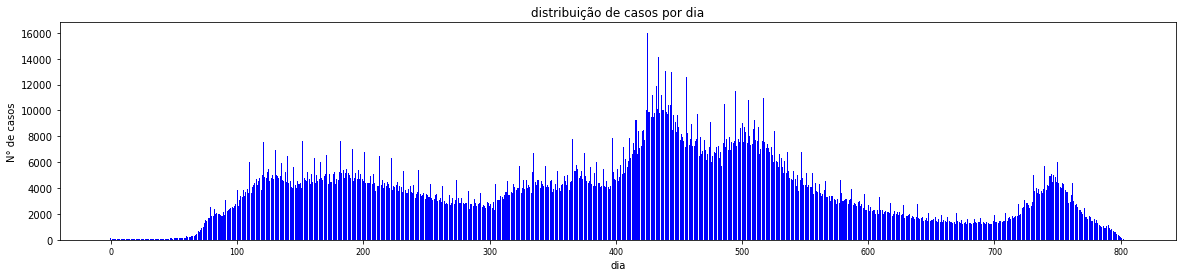

In [49]:
grafico_barra(df_dia,xlabel = "dia",ylabel = "N° de casos",title = "distribuição de casos por dia")

tentando agrupar os casos pelo dia da notificação ao invés do primeiro sintoma vemos que o gráfico fica estranho, talvez por alguma burocracia de segurar os casos para notificar no início da semana

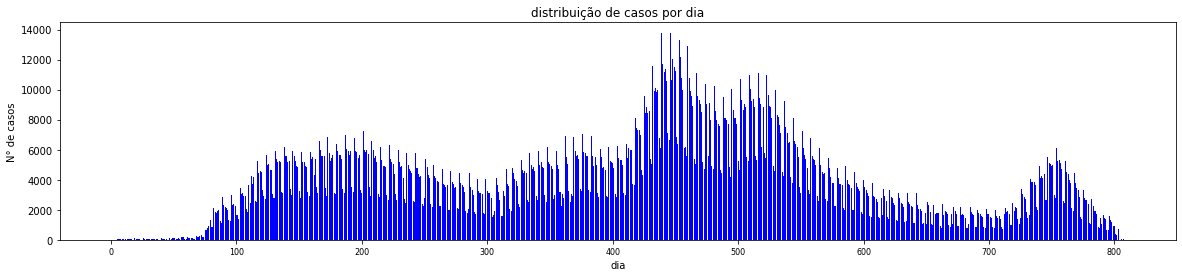

In [50]:
grafico_barra(df[["DIA_NOT","DT_NOTIFIC"]].groupby(by="DIA_NOT").count().rename(columns = {"DT_NOTIFIC": "N_casos"}).N_casos,xlabel = "dia",ylabel = "N° de casos",title = "distribuição de casos por dia")

# Tratamento de dados ausentes

Podemos, com isso, classificar os casos em ondas. De acordo com as seguintes notícias:

https://diariodepetropolis.com.br/integra/secretaria-mostra-estudo-com-avaliacao-das-cinco-ondas-da-covid-19-no-rj-207935

https://www.saude.rj.gov.br/noticias/2022/03/secretaria-de-saude-divulga-estudo-com-avaliacao-das-cinco-ondas-da-covid-19-no-estado-do-rio-de-janeiro

1. Na **1ª onda,** ocorrida entre os meses de abril e maio de 2020 **(05/04 a 23/05 de 2020),** a predominância foi da **variante B.1.1.33,** cepa inicial que chegou ao Brasil. 
Ela não era considerada uma cepa de preocupação (VOC) e já se encontrava em todos os continentes do mundo. 
Durante essa onda, foram registrados 99.760 casos, 24.174 internações e 11.270 óbitos. 

2. A **2ª onda** ocorreu entre os meses de novembro de 2020 e janeiro de 2021 **(08/11/2020 a 16/01/2021),** com predomínio da P.2 **(Zeta)**, 
considerada uma variante de interesse (VOI) e identificada primeiro no Rio de Janeiro e depois nos demais estados. 
No período, foram registrados 282.339 casos, 27.778 internações e 10.621 óbitos.

3. A **3ª onda** teve início em fevereiro de 2021, devido à entrada da variante P.1 **(Gama)** no estado. 
Ela foi detectada primeiro em Manaus e depois no restante do país. Esta foi a onda com a maior duração, 
ocorrendo até meados do mês de junho **(28/02/2021 a 12/06/2021).** 
Foram 358.980 casos notificados, 55.150 internações e 20.079 óbitos. 

4. Em **agosto de 2021,** o estado entrou na **4ª onda** com a chegada da variante A.Y.99.2 **(Delta)** 
ao país. O diferencial desta onda foi ter ocorrido após o início da campanha de vacinação (janeiro de 2021). 
Ela se mostrou menos transmissível que as outras, registrando 71.053 casos, 6.772 internações e 2.524 óbitos.

5. A **5ª onda** gerada pela entrada da variante BA.1 **(Ômicron)** no país aconteceu entre **dezembro de 2021 e janeiro de 2022.** 
Até o momento, esta foi a onda que apresentou a curva mais elevada de casos. 
Embora tenha sido a maior em número de casos (459.099), representou o **menor número de internações**, 4.607, e 1.475 óbitos, 
refletindo a efetividade da vacinação contra Covid-19.


| Nº da Onda| Data Inicial  |  Data Final |  Variante |
|-----------|:-------------:|------------:|------------------:|
| 1ª Onda   |  05/04/2020   | 23/05/2020  |  		B.1.1.33
| 2ª Onda   |  08/11/2020   |  16/01/2021 |			Zeta
| 3ª Onda   | 28/02/2021    |  12/06/2021 |			Gama
| 4ª Onda   | 15/08/2021    |  14/12/2021 |			Delta
| 5ª Onda   | 15/12/2021    |  13/04/2022 |			Ômicron


Usaremos essas datas para a classificação das ondas e para simplificar não será considerado a coexistência entre as ondas

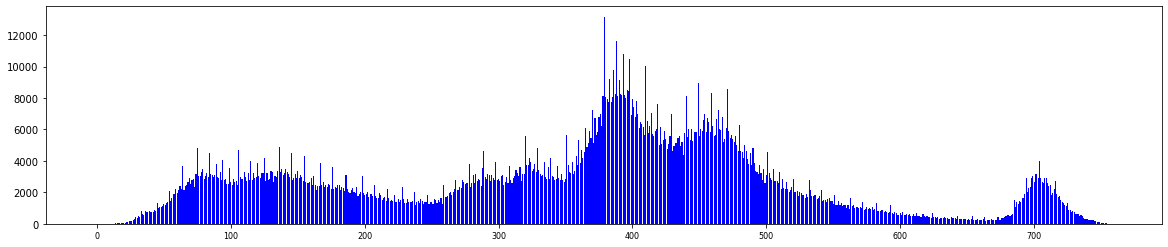

DIA_PRI
47      5
48     11
49      8
50      6
51      7
       ..
800    31
801    22
802    14
803     4
804     2
Name: N_pessoas, Length: 758, dtype: int64

In [51]:
df_cov_dia = df[df["CLASSI_FIN"] == 5][["DIA_PRI","DT_NOTIFIC"]].groupby(by="DIA_PRI").count().rename(columns = {"DT_NOTIFIC": "N_pessoas"}).N_pessoas
grafico_barra(df_cov_dia)
df_cov_dia

In [52]:
df_cov_dia.index

Int64Index([ 47,  48,  49,  50,  51,  52,  53,  54,  55,  56,
            ...
            795, 796, 797, 798, 799, 800, 801, 802, 803, 804],
           dtype='int64', name='DIA_PRI', length=758)

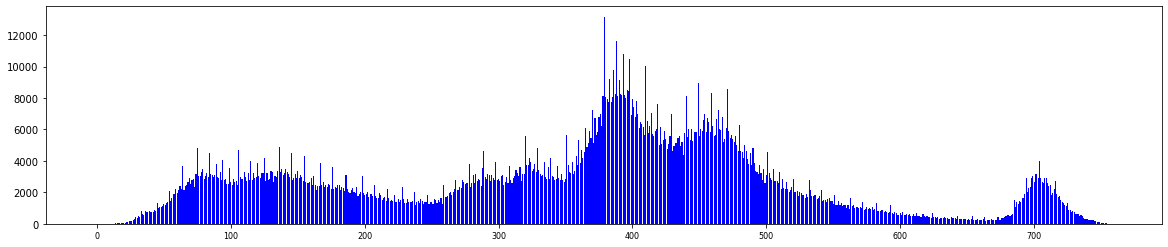

In [53]:
arr = []
for anterior,numero,posterior in zip(df_cov_dia.iloc[:-2],df_cov_dia[1:-1],df_cov_dia.iloc[2:]):
    media =  (anterior+posterior)/2
    arr.append(    1.1*media if numero > 1.1*media else numero)
df_cov_dia.N_pessoas = pd.Series(arr)
grafico_barra(df_cov_dia)

In [54]:
def analise_fft(df_dia = df_dia, primeiro_dia = 0,ultimo_dia = 800,treshold_min = None,treshold_max = None,titulo_filtro = "N° casos no dia (normalizado)", return_f = False ):
    y = (df_dia[primeiro_dia:ultimo_dia]- df_dia[primeiro_dia:ultimo_dia].mean() )/df_cov_dia[primeiro_dia:ultimo_dia].max()
    
    N = y.size
    x = np.linspace(primeiro_dia,primeiro_dia+  N,N)



    y_f = np.fft.fft(y)
    x_f = np.linspace(0,N//2, N//2)

    plt.figure(figsize = (20,5))
    plt.title("power spectrum")
    plt.plot(x_f, np.abs(y_f[:N//2]))
    plt.show()
    print()

    if treshold_min is not None:
        y_f = y_f*(treshold_min < np.abs(y_f))
    if treshold_max is not None:
        y_f = y_f*(treshold_max > np.abs(y_f))


    y_f = y_f
    y_0 = np.fft.ifft(y_f)

    plt.figure(figsize = (15,4))
    plt.title("original")
    plt.plot(x, y)
    plt.show()

    plt.figure(figsize = (15,4))
    plt.title("recovered after filter and ifft")
    plt.plot(x, y_0.real)
    plt.show()

    if return_f:
        return y_0


Será feita então uma filtragem por transformada rápida de fourier para tentar remover os outliers da função

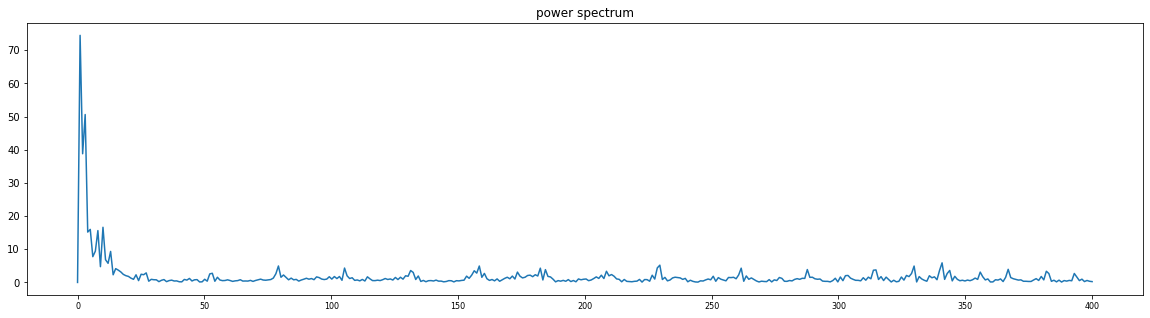

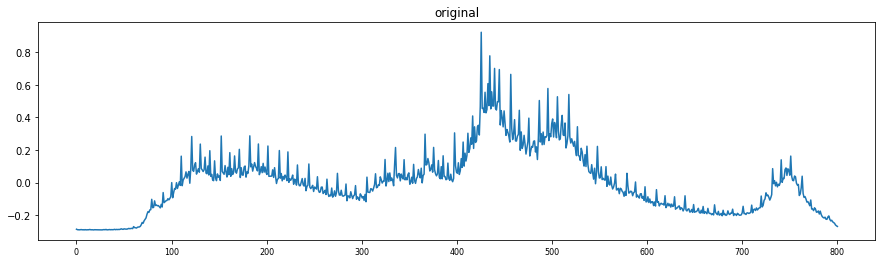

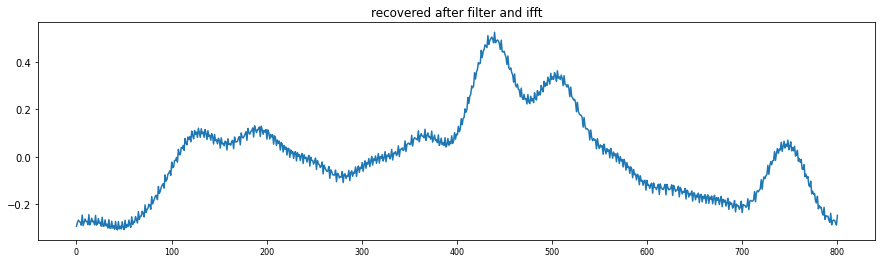

In [55]:
analise_fft(treshold_min=5)

Podemos ver as maiores ondas possuem período de 5, 52, 65 

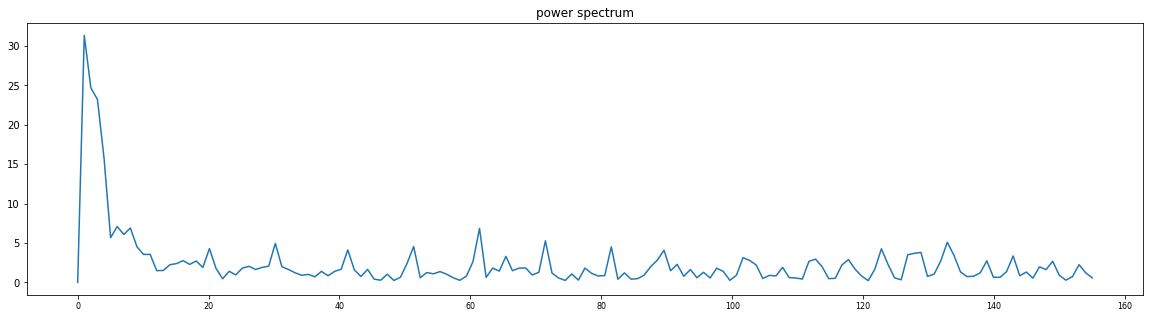

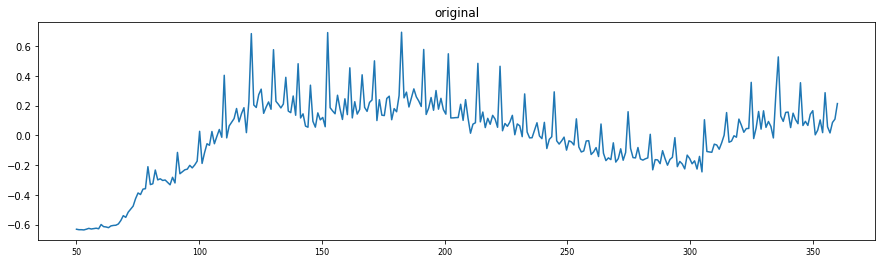

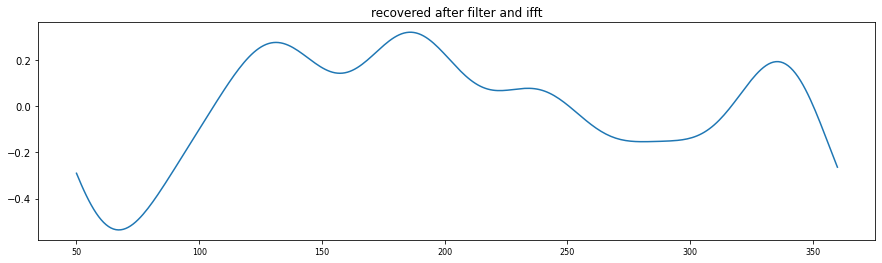

In [56]:
analise_fft(primeiro_dia = 50, ultimo_dia = 360,treshold_min=7)

Estimamos assim os pontos de início e fim das ondas


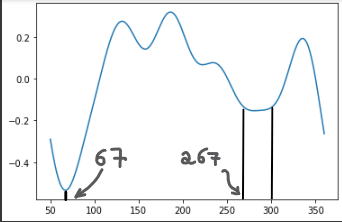

Agora analizando a terceira e quarta onda

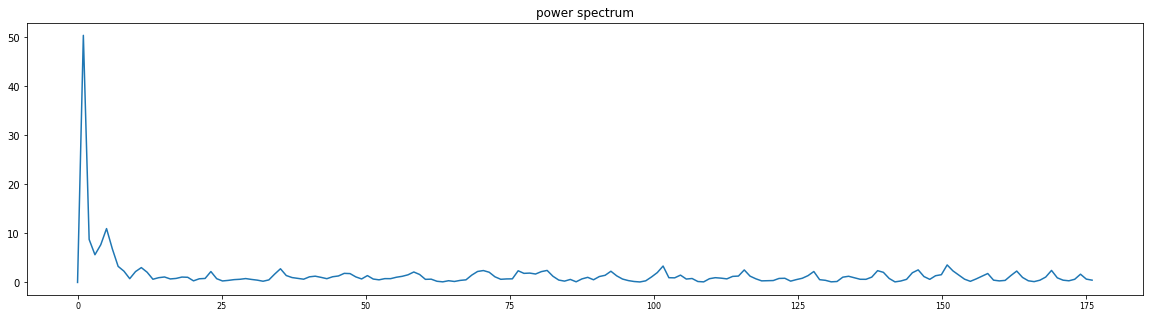

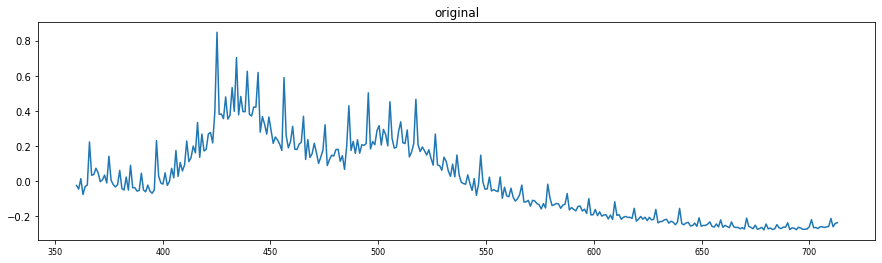

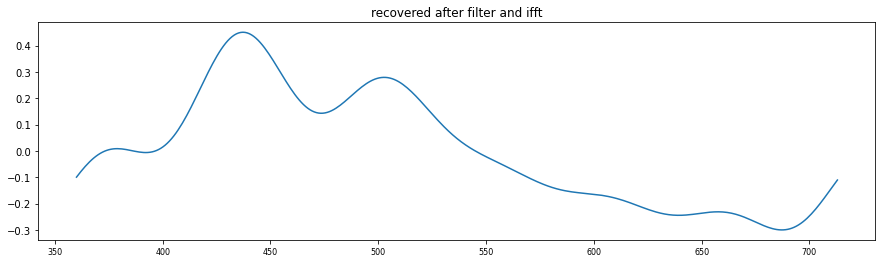

In [57]:
analise_fft(primeiro_dia =  360, ultimo_dia = 713,treshold_min=5)

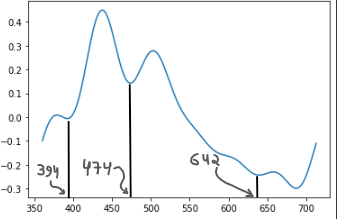

Após a quarta onda

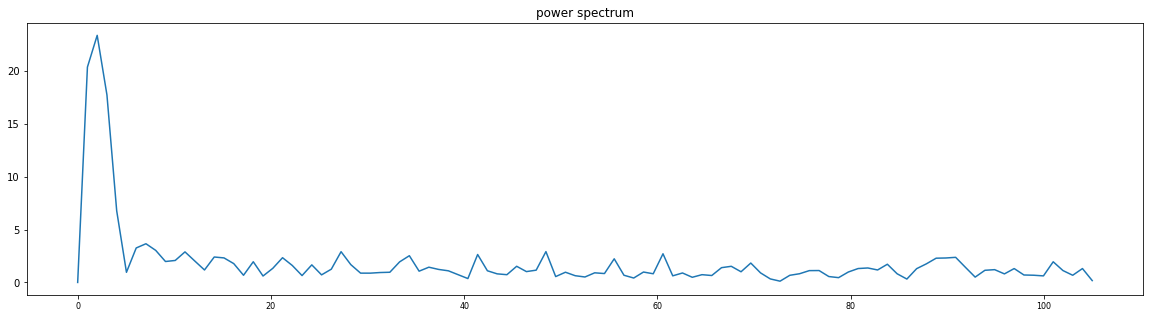

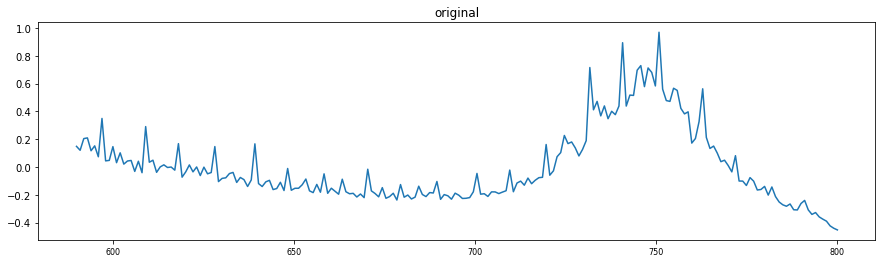

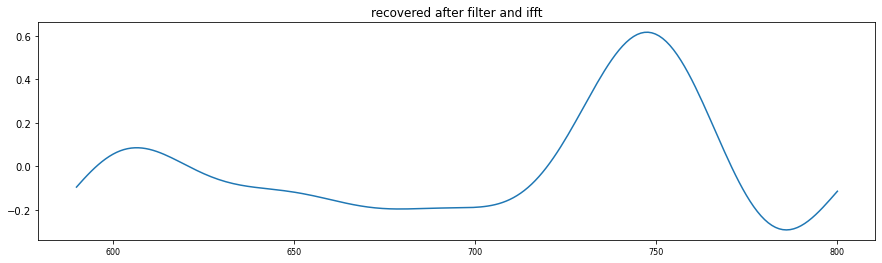

In [58]:
analise_fft(primeiro_dia = 590,treshold_min=6)

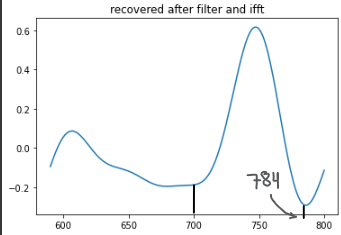

Agora podemos atribuir a qual onda pertence o caso:

In [59]:
df["ONDA"] = 0

Datas coletadas pela filtragem do fft
1. 08/03/2020 - 25/09/2020
1. 08/11/2020 - 02/02/2021
1. 29/01/2021 - 20/04/2021
1. 21/04/2021 - 04/10/2021
1. 01/12/2021 - 26/02/2022

In [60]:
df["ONDA"]= ( 
               ( (pd.to_datetime("08/03/2020",dayfirst = True) <= df["DT_SIN_PRI"])  & (df["DT_SIN_PRI"] <= pd.to_datetime("25/09/2020",dayfirst = True)))*1 
            +  ( (pd.to_datetime("08/11/2020",dayfirst = True) <= df["DT_SIN_PRI"])  & (df["DT_SIN_PRI"] <= pd.to_datetime("02/02/2021",dayfirst = True)))*2
            +  ( (pd.to_datetime("03/02/2021",dayfirst = True) <= df["DT_SIN_PRI"])  & (df["DT_SIN_PRI"] <= pd.to_datetime("20/04/2021",dayfirst = True)))*3 
            +  ( (pd.to_datetime("21/04/2021",dayfirst = True) <= df["DT_SIN_PRI"])  & (df["DT_SIN_PRI"] <= pd.to_datetime("04/10/2021",dayfirst = True)))*4 
            +  ( (pd.to_datetime("01/12/2021",dayfirst = True) <= df["DT_SIN_PRI"])                                                                      )*5 
            )


In [61]:
d = lambda data: pd.to_datetime(data,dayfirst = True)
( d("08/11/2020") - d("25/09/2020") ).days

def linearizacao(data1,data2,data,b):
    data1 = d(data1)
    data2 = d(data2)
    
    a     = 1/(data2 - data1).days
    delta = (data  - data1).days
    
    y = a*delta + b

    return y

linearizacao("25/09/2020","08/11/2020",df["DT_SIN_PRI"].iloc[0],1)

-4.954545454545455

In [62]:
df["ONDA"] = np.where(
    (df["DT_SIN_PRI"] < d("08/03/2020")),   
    (df["DT_SIN_PRI"]-d("01/01/2020"))/(d("08/03/2020")-d("01/01/2020")),
    df["ONDA"]
)

df["ONDA"] = np.where(
    (d("25/09/2020") < df["DT_SIN_PRI"])  & (df["DT_SIN_PRI"] < d("08/11/2020") ),   
    (df["DT_SIN_PRI"]-d("25/09/2020"))/(d("08/11/2020")-d("25/09/2020")) + 1,
    df["ONDA"]
)

df["ONDA"] = np.where(
    (d("04/10/2021") < df["DT_SIN_PRI"])  & (df["DT_SIN_PRI"] < d("01/12/2021") ),   
    (df["DT_SIN_PRI"]-d("04/10/2021"))/(d("01/12/2021")-d("04/10/2021")) + 4,
    df["ONDA"]
)


In [63]:
df[df["ONDA"] == 0]["DT_SIN_PRI"].unique()

array(['2020-01-01T00:00:00.000000000'], dtype='datetime64[ns]')

# Categorizando dados

Começaremos agora a observar os fatores de risco que estão no nosso dataframe

In [64]:
lista_fatores = [
    "FATOR_RISC",
    "CARDIOPATI",
    "ASMA",
    "PNEUMOPATI",
    "DIABETES",
    "IMUNODEPRE",
    "OBESIDADE",]

A maioria dos casos de obesidade nao possui IMC registrada. Infelizmente, temos casos de obesidade sem sentido (com IMC muito pequeno). Por isso vamos apenas considerar obesidades registradas como morbida ( IMC≥40  )

Além disso, manteremos apenas aqueles com:  10≤IMC≤80

In [65]:
df_obesos_por_IMC = df[["OBES_IMC","DT_NOTIFIC","NU_IDADE_N"]].groupby(by = "OBES_IMC").count().rename(columns = {"DT_NOTIFIC": "N_pessoas"})["N_pessoas"].to_frame()
df_obesos_por_IMC

,N_pessoas
OBES_IMC,
0,3118
"0,03",5
"0,1",2034
"0,2",450
"0,3",89
...,...
96,1
98,5
"98,7",1


É necessário converter os valores do imc para float, já que foram escritos com vírgula na casa decimal

In [66]:
def conversion(numero_str):
    f = None
    try:
        f= float(numero_str.replace(',','.'))
    except:
        1+1
        #print(numero_str,type(numero_str))
    return f

In [67]:
df["OBES_IMC"] = df["OBES_IMC"].apply(conversion)

df[df["OBESIDADE"] == 1][pd.isnull(df["OBES_IMC"])== False][["OBES_IMC","OBESIDADE"]]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


,OBES_IMC,OBESIDADE
89,37.2,1.0
119,49.8,1.0
136,4.1,1.0
146,5.6,1.0
180,40.0,1.0
...,...,...
3107314,0.0,1.0
3107402,40.0,1.0
3107409,1.0,1.0
3107482,29.4,1.0


Vemos que existiam pessoas com obesidade absurda, considerando que acima de 40 já é obesidade mórbida

In [68]:
obesos_int = round(df[["OBES_IMC","DT_NOTIFIC","NU_IDADE_N"]][ pd.isnull(df["OBES_IMC"])  == False ]) # aproximando o IMC para inteiro
obesos_int_por_IMC = obesos_int[obesos_int.OBES_IMC < 80][obesos_int.OBES_IMC > 10].groupby(by = "OBES_IMC").count().rename(columns = {"DT_NOTIFIC": "N_pessoas"})["N_pessoas"].to_frame()
obesos_int.sort_values(by="OBES_IMC")[(obesos_int.OBES_IMC > 100)][["OBES_IMC","NU_IDADE_N"]]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


,OBES_IMC,NU_IDADE_N
2447845,284.0,55
331425,286.0,85
72804,327.0,22
1645214,329.0,78
2381266,363.0,68
1125697,403.0,39
454961,410.0,44
2501436,419.0,49
1615839,425.0,51
708926,620.0,51


E aqui vemos que tem pessoas extremamente abaixo do peso, sabendo que abaixo de 18 já está abaixo do peso

In [69]:
obesos_int.sort_values(by="OBES_IMC")[(obesos_int.OBES_IMC < 10)].groupby(by = "OBES_IMC").count().rename(columns = {"DT_NOTIFIC": "N_pessoas"})["N_pessoas"].to_frame()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,N_pessoas
OBES_IMC,
0.0,5739
1.0,821
2.0,156
3.0,616
4.0,868
5.0,80
6.0,30
7.0,6
8.0,5


Ao final obtivemos essa quantidade de obesos

In [70]:
df_morbidos = df[["OBES_IMC","NU_IDADE_N","DT_NOTIFIC"]][df["OBES_IMC"] >=40.0]
df_morbidos

,OBES_IMC,NU_IDADE_N,DT_NOTIFIC
119,49.8,33,2020-04-01
180,40.0,41,2020-04-09
362,42.4,28,2020-05-07
376,99.9,61,2020-05-04
567,41.0,39,2020-05-14
...,...,...,...
3098837,61.7,33,2022-01-27
3100047,47.0,61,2022-02-11
3100926,40.0,55,2022-01-14
3102800,43.7,18,2022-02-16


In [71]:
df[(pd.isnull(df["OBES_IMC"])  | pd.isnull(df["OBESIDADE"])) & (df["OBESIDADE"] != False) & (df["OBES_IMC"] != False)]

,NU_IDADE_N,FATOR_RISC,CARDIOPATI,ASMA,PNEUMOPATI,DIABETES,IMUNODEPRE,OBESIDADE,OBES_IMC,VACINA_COV,...,SEM_PRI,ANO_DOSE_1_COV,ANO_DOSE_2_COV,ANO_DT_ENTUTI,ANO_DT_INTERNA,ANO_DT_NOTIFIC,ANO_DT_SIN_PRI,DIA_PRI,DIA_NOT,ONDA
0,7,S,NaN,NaN,1.0,NaN,1.0,NaN,NaN,2,...,2,NaN,NaN,NaN,2020,2020,2020,7,10,0.089552
2,57,S,1.0,2.0,2.0,1.0,2.0,2.0,NaN,2,...,6,NaN,NaN,2020,2020,2020,2020,39,44,0.567164
3,9,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,...,5,NaN,NaN,NaN,2020,2020,2020,26,27,0.373134
4,1,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,...,2,NaN,NaN,NaN,2020,2020,2020,10,16,0.134328
5,28,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,...,9,NaN,NaN,NaN,NaN,2020,2020,55,57,0.805970
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3107768,41,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,...,112,2021,2021,NaN,2022,2022,2022,770,770,5.000000
3107769,1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,...,113,NaN,NaN,2022,2022,2022,2022,777,796,5.000000
3107770,89,1,1.0,2.0,2.0,2.0,2.0,2.0,NaN,1,...,113,2021,2021,NaN,2022,2022,2022,779,785,5.000000
3107771,81,1,1.0,2.0,2.0,2.0,2.0,2.0,NaN,1,...,112,2021,2021,NaN,2022,2022,2022,770,780,5.000000


In [72]:
df[ df.OBES_IMC >= 30.0][df.OBESIDADE !=1][["OBES_IMC", "OBESIDADE" ,"NU_IDADE_N"]]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,OBES_IMC,OBESIDADE,NU_IDADE_N


Removemos agora os outliers e categorizando os obesos em obesos (2), não obesos (9) e obesos mórbidos (1)

In [73]:
df_erro_IMC = df[ (df["OBES_IMC"] > 80) | (df["OBES_IMC"] < 10 ) ]
df.drop(df_erro_IMC.index , inplace = True)

df.OBESIDADE = np.where( df.OBES_IMC >= 30.0, 1, df.OBESIDADE )

df["OBES_MORB"] = ( 1.0*(df.OBES_IMC >= 40.0)  + 2.0*(df.OBES_IMC < 40.0)  ) + 9.0*(pd.isnull(df.OBES_IMC))
df[df["OBES_MORB"] == 1.0]

,NU_IDADE_N,FATOR_RISC,CARDIOPATI,ASMA,PNEUMOPATI,DIABETES,IMUNODEPRE,OBESIDADE,OBES_IMC,VACINA_COV,...,ANO_DOSE_1_COV,ANO_DOSE_2_COV,ANO_DT_ENTUTI,ANO_DT_INTERNA,ANO_DT_NOTIFIC,ANO_DT_SIN_PRI,DIA_PRI,DIA_NOT,ONDA,OBES_MORB
119,33,S,NaN,NaN,NaN,NaN,NaN,1.0,49.8,2,...,NaN,NaN,NaN,2020,2020,2020,90,92,1.0,1.0
180,41,S,1.0,2.0,2.0,2.0,2.0,1.0,40.0,2,...,NaN,NaN,NaN,2020,2020,2020,95,100,1.0,1.0
362,28,S,1.0,1.0,2.0,2.0,2.0,1.0,42.4,2,...,NaN,NaN,NaN,2020,2020,2020,114,128,1.0,1.0
567,39,S,NaN,NaN,NaN,NaN,NaN,1.0,41.0,2,...,NaN,NaN,2020,2020,2020,2020,134,135,1.0,1.0
572,55,S,1.0,2.0,2.0,2.0,2.0,1.0,42.7,2,...,NaN,NaN,NaN,2020,2020,2020,114,125,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3098837,33,1,1.0,2.0,2.0,2.0,2.0,1.0,61.7,1,...,NaN,NaN,2022,2022,2022,2022,755,758,5.0,1.0
3100047,61,1,1.0,NaN,NaN,NaN,NaN,1.0,47.0,2,...,NaN,NaN,2022,2022,2022,2022,741,773,5.0,1.0
3100926,55,1,1.0,2.0,2.0,1.0,2.0,1.0,40.0,1,...,2021,2021,2022,2022,2022,2022,741,745,5.0,1.0
3102800,18,1,NaN,NaN,NaN,NaN,NaN,1.0,43.7,2,...,NaN,NaN,NaN,NaN,2022,2022,761,778,5.0,1.0


Podemos ver agora a distribuição das pessoas por imc como ficou

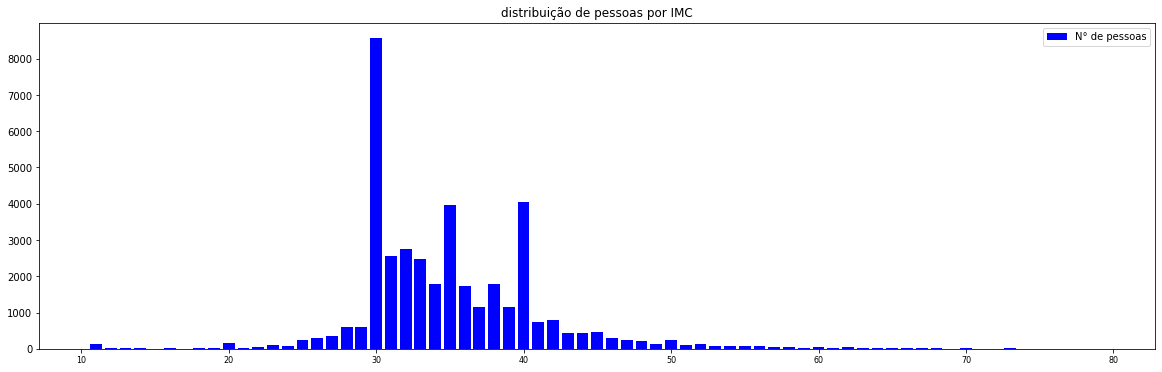

In [74]:
plt.figure(figsize=(20, 6)) 
plt.bar(obesos_int_por_IMC.index, obesos_int_por_IMC.N_pessoas, color = 'b', label='N° de pessoas',)

plt.title("distribuição de pessoas por IMC")
plt.legend()
plt.show()

In [75]:
del df_obesos_por_IMC
del obesos_int_por_IMC
del obesos_int
del df_morbidos

# Normalizando dados

Vamos agora olhar para a coluna fator de risco

In [76]:
df[pd.isnull(df["FATOR_RISC"])]

,NU_IDADE_N,FATOR_RISC,CARDIOPATI,ASMA,PNEUMOPATI,DIABETES,IMUNODEPRE,OBESIDADE,OBES_IMC,VACINA_COV,...,ANO_DOSE_1_COV,ANO_DOSE_2_COV,ANO_DT_ENTUTI,ANO_DT_INTERNA,ANO_DT_NOTIFIC,ANO_DT_SIN_PRI,DIA_PRI,DIA_NOT,ONDA,OBES_MORB


Todas as linhas desta coluna estão preenchidas, S para sim e N para não possuir fatores de risco

In [77]:
df[lista_fatores][df[lista_fatores]["FATOR_RISC"] == 'S']

,FATOR_RISC,CARDIOPATI,ASMA,PNEUMOPATI,DIABETES,IMUNODEPRE,OBESIDADE
0,S,NaN,NaN,1.0,NaN,1.0,NaN
2,S,1.0,2.0,2.0,1.0,2.0,2.0
8,S,2.0,2.0,2.0,2.0,2.0,2.0
10,S,1.0,2.0,2.0,2.0,2.0,2.0
11,S,1.0,NaN,1.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...
1199984,S,2.0,2.0,2.0,2.0,2.0,2.0
1199986,S,1.0,NaN,NaN,NaN,NaN,NaN
1199987,S,NaN,NaN,NaN,1.0,NaN,NaN
1199990,S,1.0,2.0,2.0,1.0,2.0,2.0


In [78]:
df.FATOR_RISC = np.where(df["FATOR_RISC"] == 'S',1,df.FATOR_RISC)

In [79]:
df[lista_fatores][df[lista_fatores]["FATOR_RISC"] == 'N']

,FATOR_RISC,CARDIOPATI,ASMA,PNEUMOPATI,DIABETES,IMUNODEPRE,OBESIDADE
3,N,NaN,NaN,NaN,NaN,NaN,NaN
4,N,NaN,NaN,NaN,NaN,NaN,NaN
5,N,NaN,NaN,NaN,NaN,NaN,NaN
6,N,NaN,NaN,NaN,NaN,NaN,NaN
7,N,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
1199980,N,NaN,NaN,NaN,NaN,NaN,NaN
1199981,N,NaN,NaN,NaN,NaN,NaN,NaN
1199985,N,NaN,NaN,NaN,NaN,NaN,NaN
1199988,N,NaN,NaN,NaN,NaN,NaN,NaN


In [80]:
df.FATOR_RISC = np.where(df["FATOR_RISC"] == 'N',2,df.FATOR_RISC)

In [81]:
for col in lista_fatores[:-1]:
    print(df[(df[col] != 1.0) & (df[col] != 2.0) & (df[col] != 9.0) &  ( pd.isnull(df[col] ) == False )][col])

Series([], Name: FATOR_RISC, dtype: object)
Series([], Name: CARDIOPATI, dtype: float64)
Series([], Name: ASMA, dtype: float64)
Series([], Name: PNEUMOPATI, dtype: float64)
Series([], Name: DIABETES, dtype: float64)
Series([], Name: IMUNODEPRE, dtype: float64)


In [82]:
for col in lista_fatores[:-1]:
    df[col] = np.where(pd.isnull(df[col]),9,df[col])
    
df[lista_fatores[:-1]]

,FATOR_RISC,CARDIOPATI,ASMA,PNEUMOPATI,DIABETES,IMUNODEPRE
0,1,9.0,9.0,1.0,9.0,1.0
2,1,1.0,2.0,2.0,1.0,2.0
3,2,9.0,9.0,9.0,9.0,9.0
4,2,9.0,9.0,9.0,9.0,9.0
5,2,9.0,9.0,9.0,9.0,9.0
...,...,...,...,...,...,...
3107768,2,9.0,9.0,9.0,9.0,9.0
3107769,2,9.0,9.0,9.0,9.0,9.0
3107770,1,1.0,2.0,2.0,2.0,2.0
3107771,1,1.0,2.0,2.0,2.0,2.0


Agora os dados dos fatores de risco estão normalizados para 1 e 2 ao invés de 'S' e 'N'

Consideraremos fator de risco grave as comorbidades selecionadas anteriormente, como problemas cardiacos, respiratórios, imunológicos e obesidade. Categorizando assim mais uma coluna.

In [83]:
df["FATOR_RISC_GRAVE"] = 1.0*( 
    (df[lista_fatores[1:]] == 1).any("columns") # se alguma coluna tiver comorbidade, fator_risc = 1 (com comorbidade)
    ) + 2.0*( 
            (df[lista_fatores[1:]]== 2).all("columns") # se todas colunas nao tiverem comorbidade, fator_risc = 2 (sem comorbidade)
            ) + 9.0*(
                    (df[lista_fatores[1:]] != 1 ).all("columns") & (df[lista_fatores[1:]] != 2).any("columns") # se nenhuma comorbidade, mas há uma comorbidade ignorada, fator_risc = 9 (ignorado)
                    )
df[["FATOR_RISC_GRAVE"]+lista_fatores]

,FATOR_RISC_GRAVE,FATOR_RISC,CARDIOPATI,ASMA,PNEUMOPATI,DIABETES,IMUNODEPRE,OBESIDADE
0,1.0,1,9.0,9.0,1.0,9.0,1.0,NaN
2,1.0,1,1.0,2.0,2.0,1.0,2.0,2.0
3,9.0,2,9.0,9.0,9.0,9.0,9.0,NaN
4,9.0,2,9.0,9.0,9.0,9.0,9.0,NaN
5,9.0,2,9.0,9.0,9.0,9.0,9.0,NaN
...,...,...,...,...,...,...,...,...
3107768,9.0,2,9.0,9.0,9.0,9.0,9.0,NaN
3107769,9.0,2,9.0,9.0,9.0,9.0,9.0,NaN
3107770,1.0,1,1.0,2.0,2.0,2.0,2.0,2.0
3107771,1.0,1,1.0,2.0,2.0,2.0,2.0,2.0


In [84]:
for col in ["HOSPITAL","UTI","EVOLUCAO","TOMO_RES","RES_AN","PCR_RESUL","POS_AN_FLU","RES_IGG","RES_IGM","RES_IGA"]:
    print("\nvalores possíveis antes da limpeza: \n",df[col].drop_duplicates())
    df[col] = np.where(pd.isnull(df[col]  ), 9, df[col])
    print("\nvalores possíveis depois da limpeza:\n ",df[col].drop_duplicates())


valores possíveis antes da limpeza: 
 0      1.0
5      2.0
143    NaN
629    9.0
Name: HOSPITAL, dtype: float64

valores possíveis depois da limpeza:
  0      1.0
5      2.0
143    9.0
Name: HOSPITAL, dtype: float64

valores possíveis antes da limpeza: 
 0     2.0
2     1.0
5     NaN
70    9.0
Name: UTI, dtype: float64

valores possíveis depois da limpeza:
  0    2.0
2    1.0
5    9.0
Name: UTI, dtype: float64

valores possíveis antes da limpeza: 
 0     1.0
2     2.0
4     NaN
14    3.0
76    9.0
Name: EVOLUCAO, dtype: float64

valores possíveis depois da limpeza:
  0     1.0
2     2.0
4     9.0
14    3.0
Name: EVOLUCAO, dtype: float64

valores possíveis antes da limpeza: 
 0       NaN
5       6.0
20      9.0
38      1.0
229     5.0
316     3.0
331     2.0
1750    4.0
Name: TOMO_RES, dtype: float64

valores possíveis depois da limpeza:
  0       9.0
5       6.0
38      1.0
229     5.0
316     3.0
331     2.0
1750    4.0
Name: TOMO_RES, dtype: float64

valores possíveis antes da limp

Analizando o fator de risco por idade

Média de idade: 61.35
Desvio padrão da idade: 19.9
idades dentro de 1 desvio padrão:   [41.45, 81.25]
idades dentro de 2 desvios padrões: [21.550000000000004, 101.15]


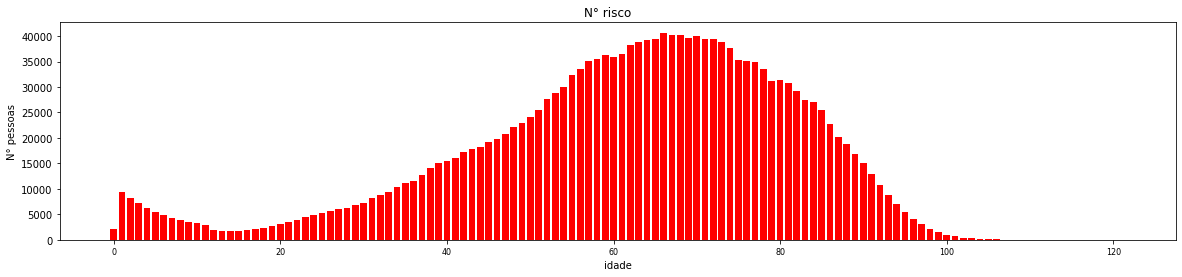

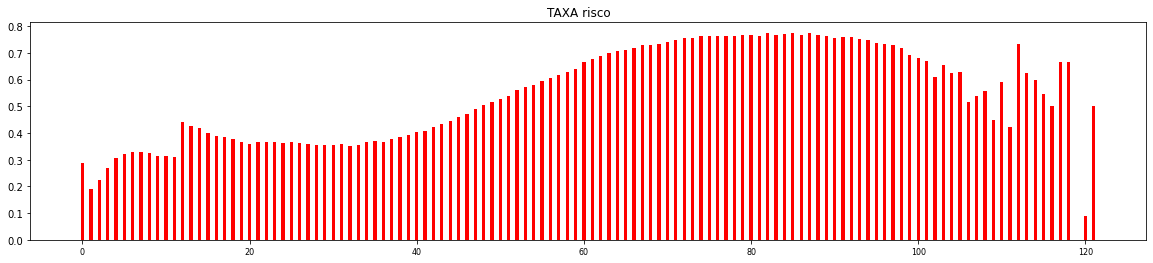




Média de idade: 46.02
Desvio padrão da idade: 23.66
idades dentro de 1 desvio padrão:   [22.360000000000003, 69.68]
idades dentro de 2 desvios padrões: [-1.2999999999999972, 93.34]


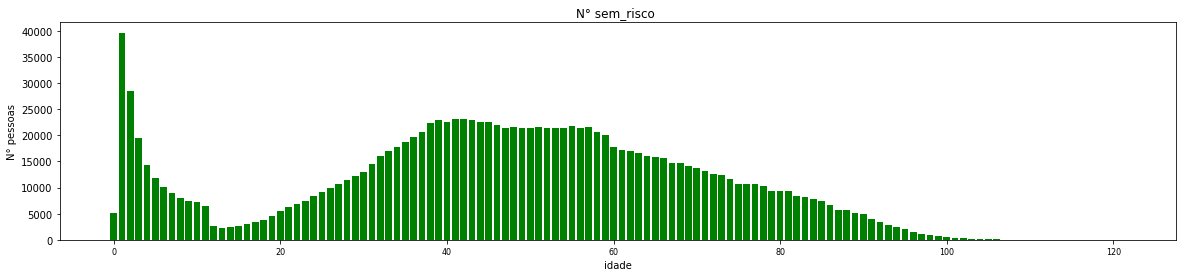

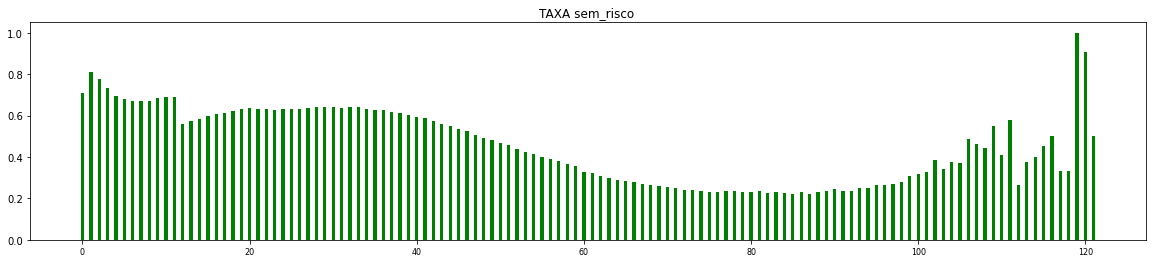

In [85]:
df_risco        = df[df["FATOR_RISC"] == 1][["DT_NOTIFIC","NU_IDADE_N",	"FATOR_RISC","EVOLUCAO"]]
df_sem_risco    = df[df["FATOR_RISC"] == 2][["DT_NOTIFIC","NU_IDADE_N",	"FATOR_RISC","EVOLUCAO"]]

df_risco_por_idade    , df_sem_risco_por_idade_taxa = plot_por_idade(df_risco     , Npessoas_idade,taxa = True, titulo = "risco     ", titulo_taxa = "risco     ",color = 'red')
df_sem_risco_por_idade, df_risco_por_idade_taxa     = plot_por_idade(df_sem_risco , Npessoas_idade,taxa = True, titulo = "sem_risco ", titulo_taxa = "sem_risco ",color = 'green')

# Estatística descritiva dos dados com visualizações

Agora plotaremos um gráfico para analisar a quantidade de casos, e checar se a maior mortalidade está realmente nos casos de fator de risco grave

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


N° casos com fator de risco:            1813828
N° casos com fator de risco não grave:  406646
N° casos com fator de risco grave:      1407182
N° casos com fator de risco grave, mas sem fator de risco:  0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  del sys.path[0]


mortalidade geral da base:                 25.03 %
mortalidade para fator de risco:           30.91 %
mortalidade para fator de risco não grave: 27.26 %
mortalidade para fator de risco grave:     31.96 %


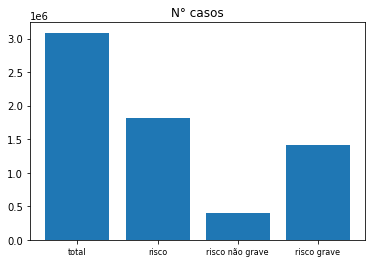

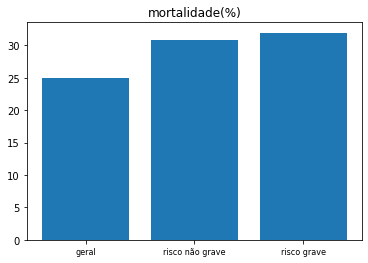

In [86]:
N_risco_naograve= len(df[df["FATOR_RISC_GRAVE"] != 1][df["FATOR_RISC"] == 1])
N_risco_absurdo = len(df[df["FATOR_RISC_GRAVE"] == 1][df["FATOR_RISC"] != 1])
N_risco_grave   = len(df[df["FATOR_RISC_GRAVE"] == 1])
N_risco = len(df[df["FATOR_RISC"] == 1])

print("N° casos com fator de risco:           ",N_risco)
print("N° casos com fator de risco não grave: ",N_risco_naograve)
print("N° casos com fator de risco grave:     ",N_risco_grave)
print("N° casos com fator de risco grave, mas sem fator de risco: ",N_risco_absurdo)

N_risco_mortos                 =  len(df[df["FATOR_RISC"      ] == 1][df["EVOLUCAO"]== 2])
N_risco_naograve_mortos        =  len(df[df["FATOR_RISC"      ] == 1][df["FATOR_RISC_GRAVE"] != 1][df["EVOLUCAO"]== 2])
N_riscos_grave_mortos          =  len(df[df["FATOR_RISC_GRAVE"] == 1][df["EVOLUCAO"]== 2])

mortalidade_risco           = round(100*N_risco_mortos       /N_risco         ,2)
mortalidade_risco_naograve  = round(100*N_risco_naograve_mortos       /N_risco_naograve,2)
mortalidade_risco_grave     = round(100*N_riscos_grave_mortos/N_risco_grave   ,2)
mortalidade_geral           = round(100*len(df[df["EVOLUCAO"]== 2])/len(df)   ,2)

print("mortalidade geral da base:                ",mortalidade_geral      ,"%")
print("mortalidade para fator de risco:          ",mortalidade_risco ,"%")
print("mortalidade para fator de risco não grave:",mortalidade_risco_naograve ,"%")
print("mortalidade para fator de risco grave:    ",mortalidade_risco_grave       ,"%")

plt.title("N° casos")
plt.bar(["total","risco","risco não grave","risco grave"],[len(df),N_risco,N_risco_naograve,N_risco_grave])
plt.show()
print()
plt.title("mortalidade(%)")
plt.bar(["geral","risco não grave","risco grave"],[mortalidade_geral,mortalidade_risco, mortalidade_risco_grave])
plt.show()


Plotando agora os fatores de risco grave por idade e comparando com os fatores de risco 

Média de idade: 62.84
Desvio padrão da idade: 18.56
idades dentro de 1 desvio padrão:   [44.28, 81.4]
idades dentro de 2 desvios padrões: [25.720000000000006, 99.96000000000001]


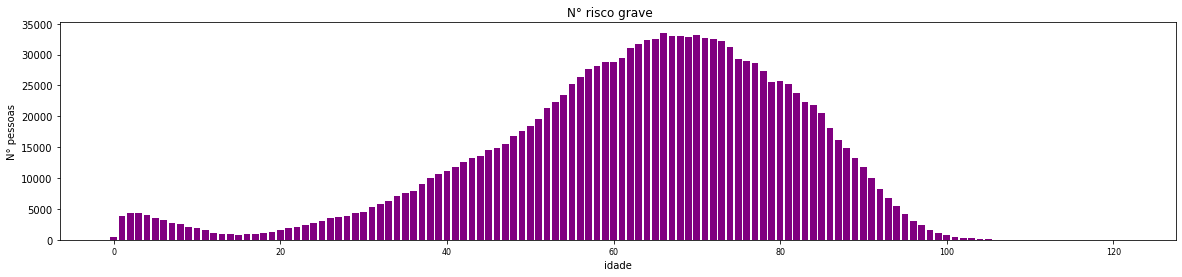

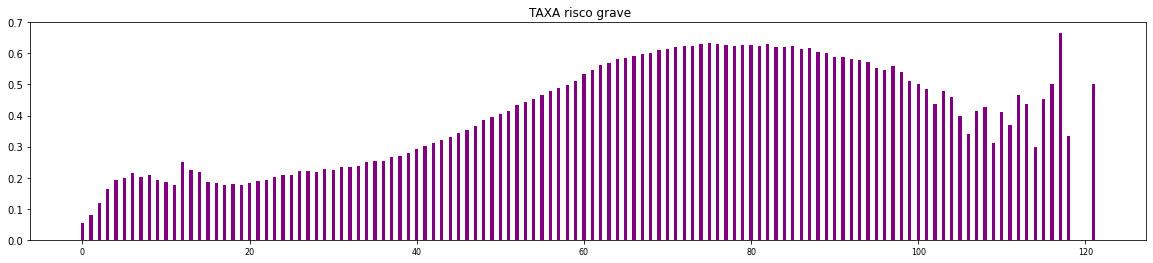

In [87]:
df_risco_grave_por_idade    , df_sem_risco_por_idade_taxa = plot_por_idade(df[df["FATOR_RISC_GRAVE"] == 1]    , Npessoas_idade,taxa = True, titulo = "risco grave    ", titulo_taxa = "risco grave    ",color = 'purple')

In [88]:
def multi_plot(distribuicoes, N_pessoas_idade,titulo = "", labels=['']*3 , titulo_taxa = ['']*3, contagem = True, taxa = False,colors = None,show = True):

       
    plt.figure(figsize=(20, 4)) 
    N = len(distribuicoes)
    if N != 2 and N!=3:  print("apenas 2 ou 3 distribuicoes por vez"); return None
    
    if colors is None: colors = ["red","green","blue"]

    if N == 2: offsets = [-0.3, 0     ]
    if N == 3: offsets = [-0.3, 0, 0.3]

    for distribuicao ,offset,color,label in zip(distribuicoes,offsets,colors,labels):
        plt.bar(
                np.arange(0,distribuicao.N_pessoas.size)+offset,
                distribuicao.N_pessoas,
                color = color,
                label = label,
                width=0.4
                )
    


    plt.title(titulo)
    plt.legend()
    plt.show()
    

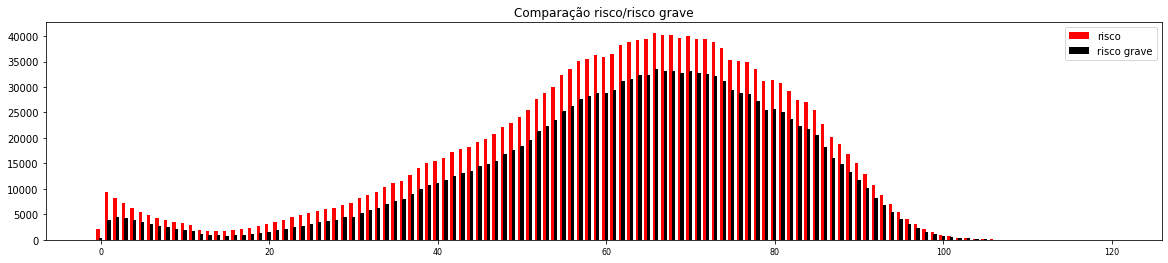

In [89]:
multi_plot([df_risco_por_idade, df_risco_grave_por_idade   ], Npessoas_idade,titulo = "Comparação risco/risco grave", labels=["risco","risco grave"] ,colors = ["red","black"])


Agora comparamos a taxa de mortalidade de pessoas com e sem comorbidade

Média de idade: 67.98
Desvio padrão da idade: 16.0
idades dentro de 1 desvio padrão:   [51.980000000000004, 83.98]
idades dentro de 2 desvios padrões: [35.980000000000004, 99.98]


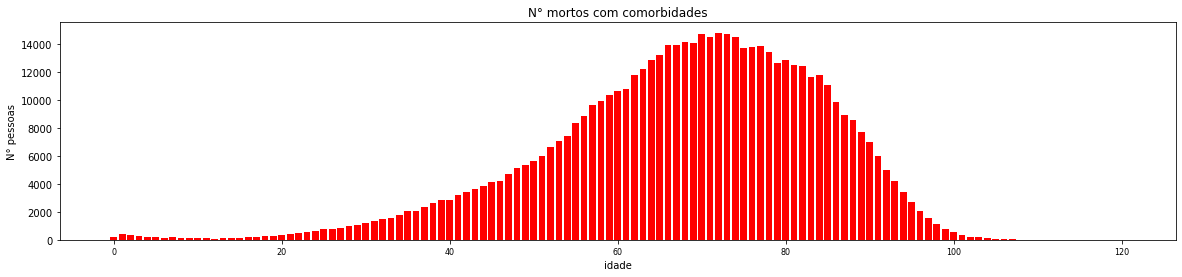

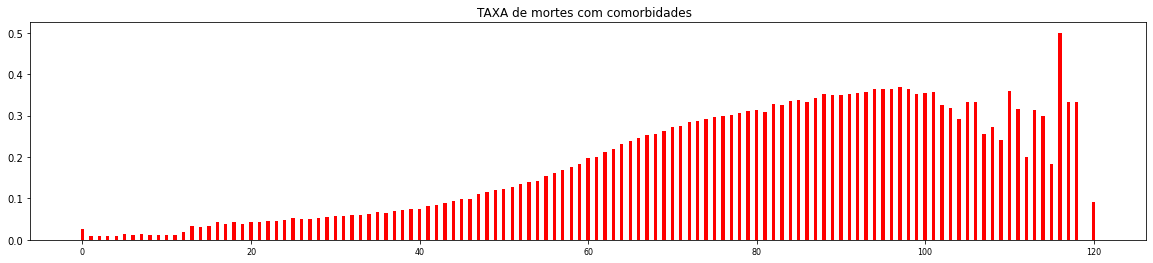




Média de idade: 63.15
Desvio padrão da idade: 18.14
idades dentro de 1 desvio padrão:   [45.01, 81.28999999999999]
idades dentro de 2 desvios padrões: [26.869999999999997, 99.43]


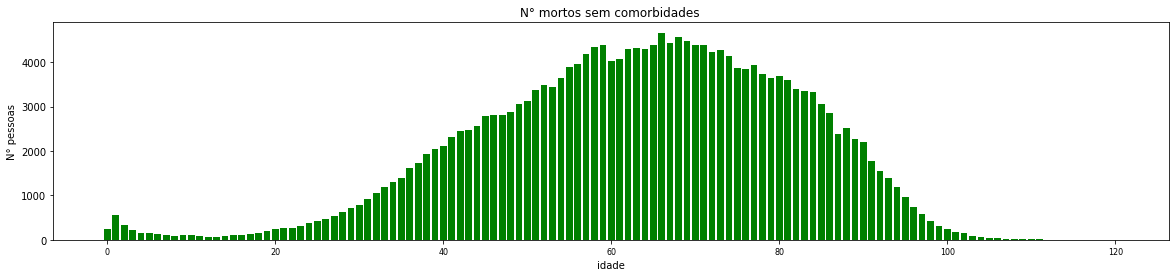

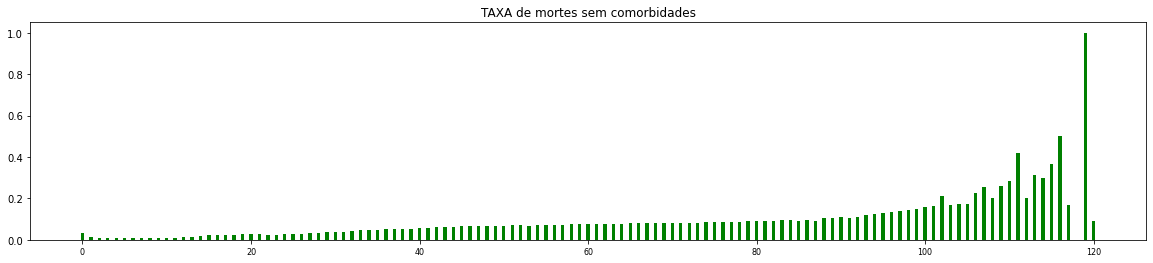




560613 mortos
30.91 % dos registros nessa base (pessoas com comorbidades) foram morreram
94.64 % mortos tem mais de 40 anos


In [90]:
df_risco_mortos     = df_risco[df_risco["EVOLUCAO"] == 2]
df_sem_risco_mortos = df_sem_risco[df_sem_risco["EVOLUCAO"] == 2]


df_risco_mortos_por_idade    ,df_risco_mortos_por_idade_taxa     = plot_por_idade(df_risco_mortos    ,Npessoas_idade, titulo = "mortos com comorbidades", titulo_taxa = "de mortes com comorbidades  ",color = 'red')
df_sem_risco_mortos_por_idade,df_sem_risco_mortos_por_idade_taxa = plot_por_idade(df_sem_risco_mortos,Npessoas_idade, titulo = "mortos sem comorbidades ",titulo_taxa = "de mortes sem comorbidades",color = 'green')



N_mortos = df_risco_mortos.shape[0]
print(N_mortos,"mortos")
print(round(100*N_mortos/df_risco.shape[0],2),"% dos registros nessa base (pessoas com comorbidades) foram morreram")
print(
    round(
        100*df_risco_mortos_por_idade[40:].sum()[0]/N_mortos,
        2),
      "% mortos tem mais de 40 anos"
     )

Como pode-se observar a idade parece estar bastante correlacionada com a mortalidade, então que tal tentar usar a idade como um fator de risco

In [91]:
df["COMORBIDADES"]        = df["FATOR_RISC"]
df["COMORBIDADE_GRAVE"] = df["FATOR_RISC_GRAVE"]
df.FATOR_RISC       = 1.0*(df["NU_IDADE_N"] >=60) + df["FATOR_RISC"]*(df["NU_IDADE_N"] < 60)
df.FATOR_RISC_GRAVE = 1.0*(df["NU_IDADE_N"] >=60) + df["FATOR_RISC_GRAVE"]*(df["NU_IDADE_N"] < 60)

Média de idade: 61.35
Desvio padrão da idade: 19.9
idades dentro de 1 desvio padrão:   [41.45, 81.25]
idades dentro de 2 desvios padrões: [21.550000000000004, 101.15]


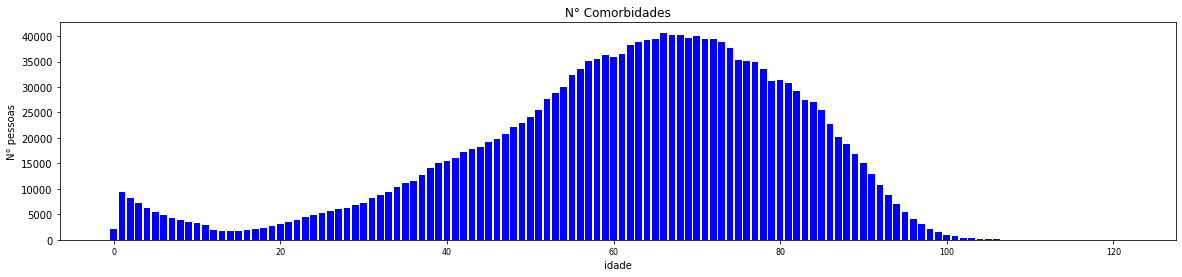

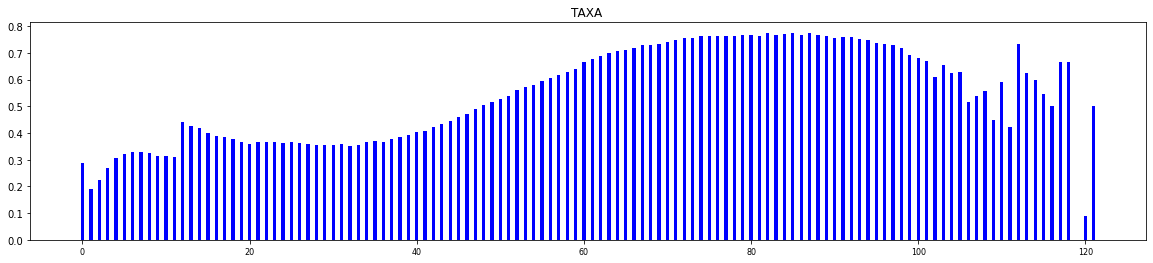




Média de idade: 63.38
Desvio padrão da idade: 19.09
idades dentro de 1 desvio padrão:   [44.290000000000006, 82.47]
idades dentro de 2 desvios padrões: [25.200000000000003, 101.56]


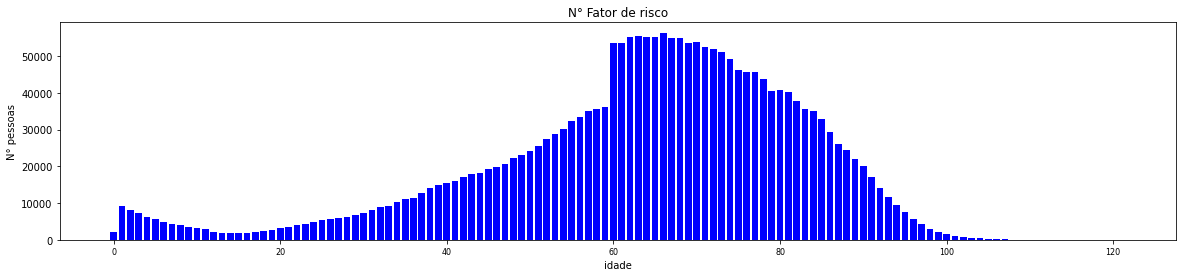

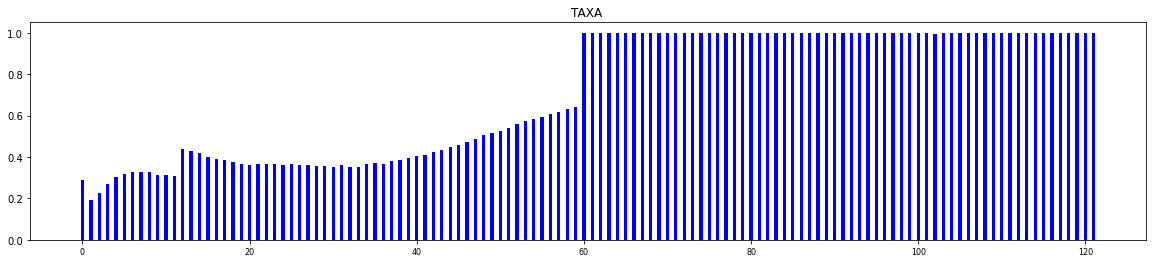

In [92]:
df_comorbidade_por_idade,df_comorbidade_por_idade_taxa = plot_por_idade(df[df["COMORBIDADES"] == 1],Npessoas_idade,"Comorbidades")
df_fator_risco_por_idade,df_fator_risco_por_idade_taxa = plot_por_idade(df[df["FATOR_RISC"] == 1],Npessoas_idade,"Fator de risco")

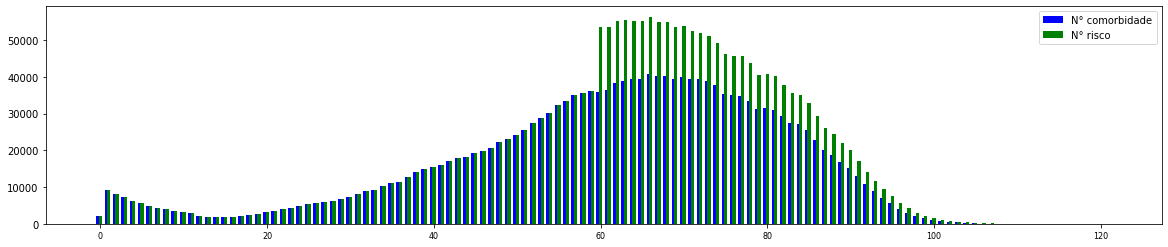

In [93]:
multi_plot([
            df_comorbidade_por_idade,
            df_fator_risco_por_idade,
            ],
           Npessoas_idade,labels = ['N° comorbidade',"N° risco"],colors = ['blue','green'])

Agora devemos analisar o efeito das vacinas

In [94]:
vacina_no_nascimento = df.index[(df['DOSE_1_COV'] == df['DT_NASC'])]
print(f'Pessoas que tomaram a primeira dose logo a nascença: {len(vacina_no_nascimento)}') 
vacina_no_nascimento_segunda_dose = df.index[(df['DOSE_2_COV'] == df['DT_NASC'])]
print(f'Pessoas que tomaram a segunda dose logo a nascença: {len(vacina_no_nascimento_segunda_dose)}') 

Pessoas que tomaram a primeira dose logo a nascença: 1
Pessoas que tomaram a segunda dose logo a nascença: 0


Existem pessoas que tomaram a vacina no dia do nascimento, o que não pode acontecer. Vamos analizar a quantidade de pessoas vacinadas por idade

Média de idade: 65.1
Desvio padrão da idade: 18.34
idades dentro de 1 desvio padrão:   [46.75999999999999, 83.44]
idades dentro de 2 desvios padrões: [28.419999999999995, 101.78]


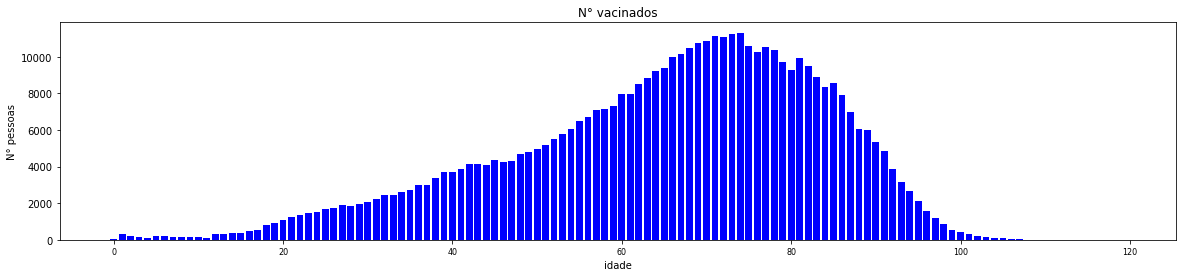

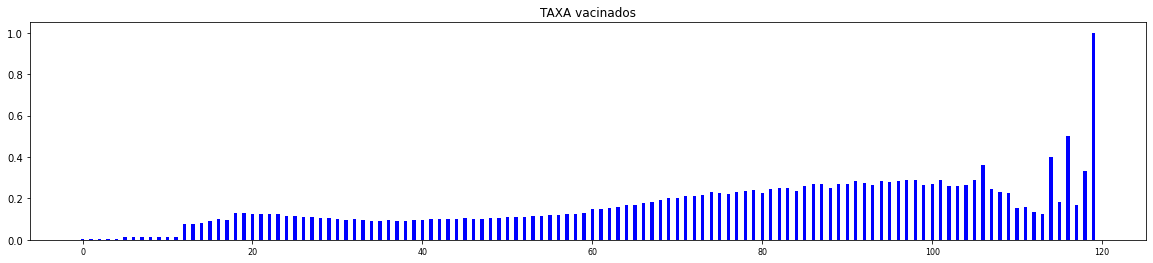

In [95]:
df_vacinados = df[df["VACINA_COV"] == 1]
Npessoas_vacinadas_por_idade, vacinados_por_idade_taxa = plot_por_idade(df_vacinados,Npessoas_idade,titulo = "vacinados", titulo_taxa = "vacinados")

In [96]:
df_vacinados_mortos = df_vacinados[df_vacinados["EVOLUCAO"] == 2]

In [97]:
df_pos_vacina = df[df["DT_SIN_PRI"] > pd.to_datetime("26/01/2021",dayfirst = 1)]

Média de idade: 65.12
Desvio padrão da idade: 18.34
idades dentro de 1 desvio padrão:   [46.78, 83.46000000000001]
idades dentro de 2 desvios padrões: [28.440000000000005, 101.80000000000001]


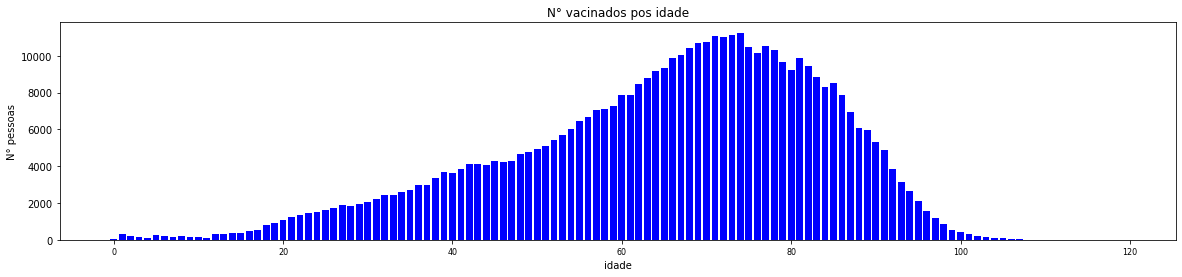

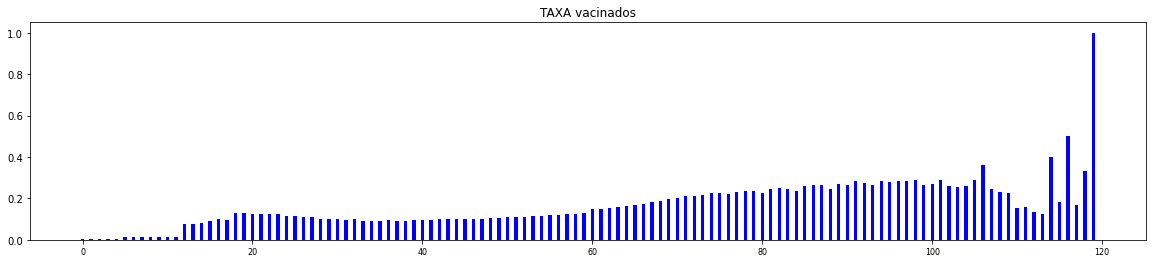

(            N_pessoas
 NU_IDADE_N           
 0                  27
 1                 291
 2                 215
 3                 147
 4                 122
 ...               ...
 115                 2
 116                 1
 117                 1
 118                 1
 119                 1
 
 [120 rows x 1 columns],             N_pessoas
 NU_IDADE_N           
 0            0.003737
 1            0.005944
 2            0.005842
 3            0.005514
 4            0.005901
 ...               ...
 117          0.166667
 118          0.333333
 119          1.000000
 120               NaN
 121               NaN
 
 [122 rows x 1 columns])

In [98]:
plot_por_idade(df_pos_vacina[df_pos_vacina["VACINA_COV"] == 1],Npessoas_idade,titulo = "vacinados pos idade", titulo_taxa = "vacinados")

Média de idade: 72.99
Desvio padrão da idade: 14.21
idades dentro de 1 desvio padrão:   [58.779999999999994, 87.19999999999999]
idades dentro de 2 desvios padrões: [44.56999999999999, 101.41]


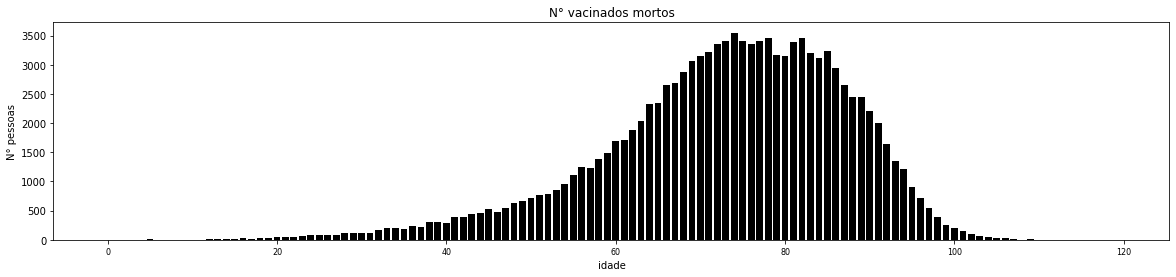

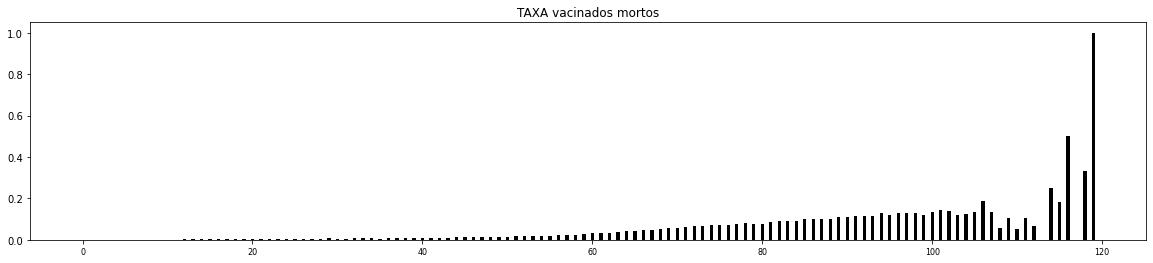

In [99]:
df_vac_mort_por_idade,_ = plot_por_idade(df_vacinados[df_vacinados["EVOLUCAO"] ==2],Npessoas_idade,titulo = "vacinados mortos", titulo_taxa = "vacinados mortos",color = 'black')

In [100]:
pd.merge(
    df_vac_mort_por_idade,
    Npessoas_vacinadas_por_idade,
    on = "NU_IDADE_N"
    ).rename(columns = {"N_pessoas_x": "N_vacinados_mortos","N_pessoas_y": "N_vacinados"})

,N_vacinados_mortos,N_vacinados
NU_IDADE_N,,
0,4,27
1,3,293
2,2,215
3,1,147
5,6,234
...,...,...
114,5,8
115,2,2
116,1,1


Nesse gráfico é possível observar a porcentagem de pessoas que foram vacinadas e morreram por idade

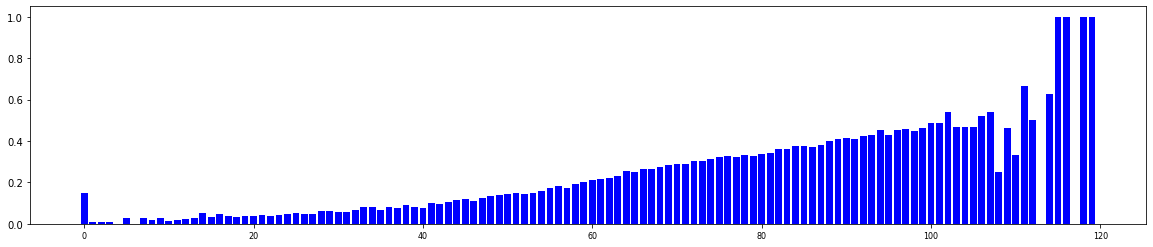

In [101]:
grafico_barra((df_vac_mort_por_idade/Npessoas_vacinadas_por_idade).N_pessoas)

Podemos agora comparar a taxa de mortalidade dos que tomaram a vacina com os que não tomaram

In [102]:
df_pos_vacina = df[df["DT_SIN_PRI"] > pd.to_datetime("31/01/2021",dayfirst = 1)]

In [103]:
Npessoas_idade_pos_vacina_nao = df_pos_vacina[df_pos_vacina["VACINA_COV"]== 2][["NU_IDADE_N","DT_NOTIFIC"]].groupby(by = "NU_IDADE_N").count().rename(columns = {"DT_NOTIFIC": "N_pessoas"})
Npessoas_idade_pos_vacina     = df_pos_vacina[df_pos_vacina["VACINA_COV"]== 1][["NU_IDADE_N","DT_NOTIFIC"]].groupby(by = "NU_IDADE_N").count().rename(columns = {"DT_NOTIFIC": "N_pessoas"})

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


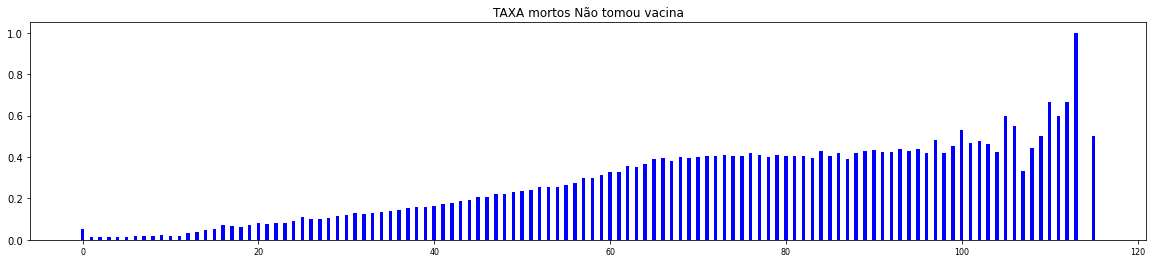

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


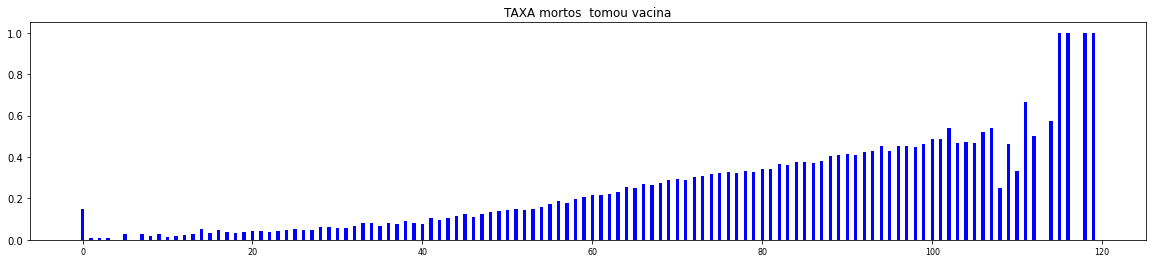

In [104]:
plot_por_idade(df_pos_vacina[df_pos_vacina["VACINA_COV"]== 2][df_pos_vacina["EVOLUCAO"]== 2],Npessoas_idade_pos_vacina_nao,return_distributions=0,titulo_taxa = "mortos Não tomou vacina",contagem = 0)
plot_por_idade(df_pos_vacina[df_pos_vacina["VACINA_COV"]== 1][df_pos_vacina["EVOLUCAO"]== 2],Npessoas_idade_pos_vacina    ,return_distributions=0,titulo_taxa = "mortos  tomou vacina"   ,contagem = 0)

Agora separando apenas os casos que foram confirmados de covid

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


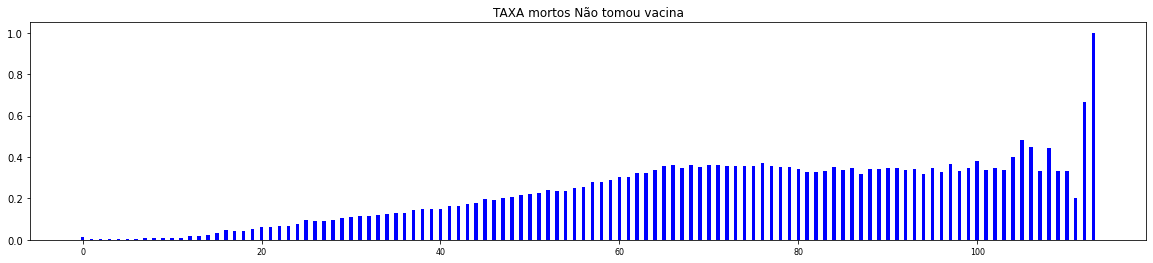

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


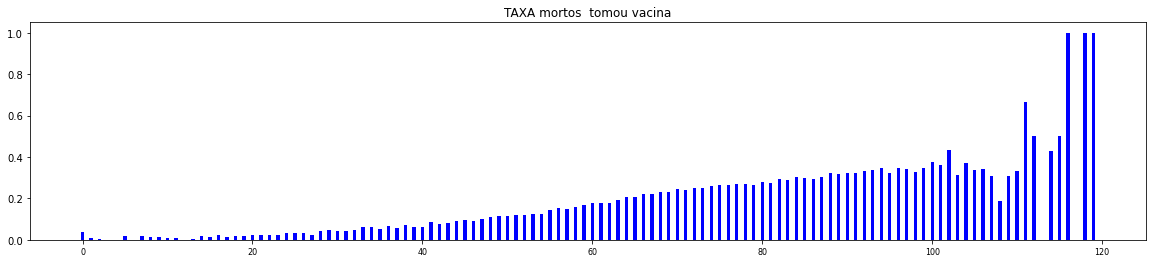

In [105]:
_,taxa_n = plot_por_idade(df_pos_vacina[df_pos_vacina["CLASSI_FIN"]== 5][df_pos_vacina["VACINA_COV"]== 2][df_pos_vacina["EVOLUCAO"]== 2],Npessoas_idade_pos_vacina_nao,titulo_taxa = "mortos Não tomou vacina",contagem = 0)
_,taxa_s = plot_por_idade(df_pos_vacina[df_pos_vacina["CLASSI_FIN"]== 5][df_pos_vacina["VACINA_COV"]== 1][df_pos_vacina["EVOLUCAO"]== 2],Npessoas_idade_pos_vacina    ,titulo_taxa = "mortos  tomou vacina"   ,contagem = 0)

Assim podemos visualizar mais facilmente

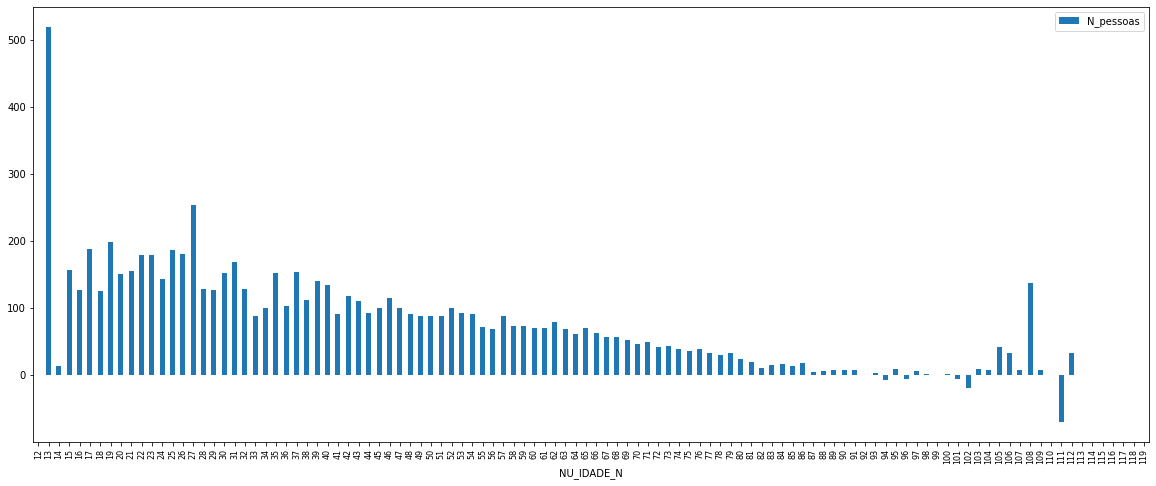

In [106]:
np.round(100*( (taxa_n[12:]/taxa_s[12:])   -1),2).plot.bar(figsize = (20,8))

# testes de hipoteses

Faremos agora alguns testes de hipóteses para saber se há diferença entre os mortos que foram ou não vacinados, mais especificamente, se os vacinados morrem menos que os não vacinados. Para isso, inicialmente criarei um dataframe com a distribuição da quantidade de obitos pelos vacinados e os não vacinados

In [107]:
Nobitos_idade = pd.DataFrame()

In [108]:
Nobitos_idade_pos_n = df_pos_vacina[df_pos_vacina["VACINA_COV"]== 2][df_pos_vacina["EVOLUCAO"] == 2][["NU_IDADE_N","DT_NOTIFIC"]].groupby(by = "NU_IDADE_N").count().rename(columns = {"DT_NOTIFIC": "n_vacinados"})
Nobitos_idade_pos_s = df_pos_vacina[df_pos_vacina["VACINA_COV"]== 1][df_pos_vacina["EVOLUCAO"] == 2][["NU_IDADE_N","DT_NOTIFIC"]].groupby(by = "NU_IDADE_N").count().rename(columns = {"DT_NOTIFIC": "vacinados"})

Nobitos_idade['vacinados'] = Nobitos_idade_pos_s['vacinados']
Nobitos_idade['n_vacinados'] = Nobitos_idade_pos_n['n_vacinados']

Nobitos_idade.describe()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,vacinados,n_vacinados
count,116.000000,112.000000
mean,1005.801724,1238.919643
std,1224.103407,1181.734213
min,1.000000,1.000000
25%,33.500000,122.250000
50%,343.000000,894.000000
75%,1910.500000,2220.000000
max,3542.000000,3843.000000


Então criamos uma coluna com a diferença do número de óbitos. Uma diferença positiva significará que a vacina está salvando mais pessoas.

In [109]:
Nobitos_idade['vacinados'] = Nobitos_idade['vacinados'].fillna(0)
Nobitos_idade['n_vacinados'] = Nobitos_idade['n_vacinados'].fillna(0)

Nobitos_idade['dif'] = Nobitos_idade['n_vacinados'] - Nobitos_idade['vacinados']

Nobitos_idade

,vacinados,n_vacinados,dif
NU_IDADE_N,,,
0,4,145.0,141.0
1,3,366.0,363.0
2,2,238.0,236.0
3,1,175.0,174.0
5,6,123.0,117.0
...,...,...,...
114,4,0.0,-4.0
115,2,1.0,-1.0
116,1,0.0,-1.0


plotando agora a diferença

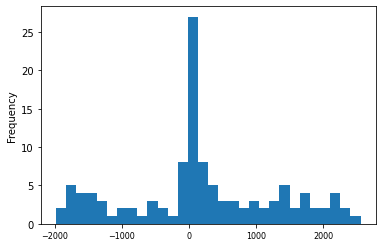

In [110]:
Nobitos_idade['dif'].plot(kind='hist', bins=30)

A distribuição não parece normal, mas podemos testar para ter certeza

In [111]:
scipy.stats.shapiro(Nobitos_idade['dif'])

ShapiroResult(statistic=0.9570401310920715, pvalue=0.0009359045652672648)

Como o pvalue deu tão baixo, essa não é uma distribuição normal, portanto não podemos usar o ttest, temos que fazer o teste de wilcoxon

In [112]:
scipy.stats.wilcoxon(Nobitos_idade['n_vacinados'], Nobitos_idade['vacinados'], alternative='greater')

WilcoxonResult(statistic=4065.5, pvalue=0.012939337856252647)

deu um pouco abaixo de 0.05, portanto a hipótese alternativa é aceita, ou seja, o número de óbitos dentre os não vacinados é maior que dentre os vacinados. Ainda acho que seria válido checar as taxas para ver se o número de óbitos entre os não vacinados também é percentualmente maior

In [113]:
Nobitos_idade_taxa = pd.DataFrame()

In [114]:
Nobitos_idade_taxa['vacinados'] = taxa_s['N_pessoas']
Nobitos_idade_taxa['n_vacinados'] = taxa_n['N_pessoas']
Nobitos_idade_taxa['vacinados'] = Nobitos_idade_taxa['vacinados'].fillna(0)
Nobitos_idade_taxa['n_vacinados'] = Nobitos_idade_taxa['n_vacinados'].fillna(0)
Nobitos_idade_taxa.describe()

,vacinados,n_vacinados
count,120.000000,120.000000
mean,0.192399,0.221471
std,0.191471,0.163129
min,0.000000,0.000000
25%,0.040765,0.073281
50%,0.156027,0.237595
75%,0.302873,0.344504
max,1.000000,1.000000


In [115]:
Nobitos_idade_taxa['dif'] = Nobitos_idade_taxa['n_vacinados'] - Nobitos_idade_taxa['vacinados']
Nobitos_idade_taxa

,vacinados,n_vacinados,dif
NU_IDADE_N,,,
0,0.037037,0.014696,-0.022341
1,0.006873,0.005360,-0.001513
2,0.004651,0.004518,-0.000134
3,0.000000,0.004370,0.004370
4,0.000000,0.004797,0.004797
...,...,...,...
115,0.500000,0.000000,-0.500000
116,1.000000,0.000000,-1.000000
117,0.000000,0.000000,0.000000


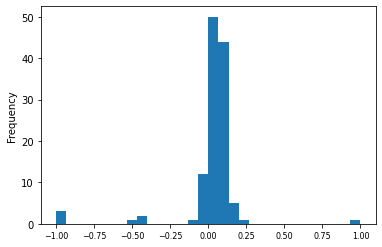

In [116]:
Nobitos_idade_taxa['dif'].plot(kind='hist', bins=30)

Essa distribuição parece mais uma gaussiana, mas podemos fazer uma limpeza de dados e remover outliers para melhorar ainda mais esses dados e também devemos checar se é realmente uma gaussiana

# Limpeza de dados

Como podemos ver realmente temos muitos outliers aqui

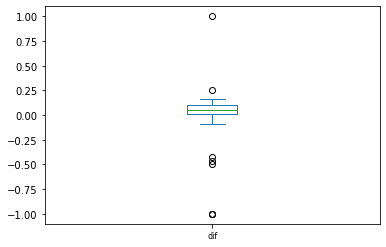

In [117]:
Nobitos_idade_taxa['dif'].plot.box()

### Removendo outliers utilizando z-score robusto (univariado)

In [118]:
from numpy import abs
mad = abs(Nobitos_idade_taxa['dif'] - Nobitos_idade_taxa['dif'].median()).median()*(1/0.6745)
print(mad)

0.06941928270923373


In [119]:
Nobitos_idade_taxa['dif'].mad()

0.09222459698500843

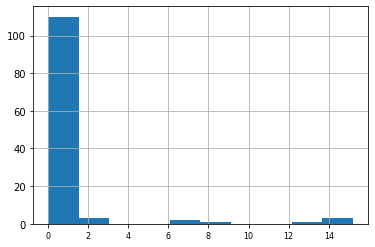

In [120]:
(abs(Nobitos_idade_taxa['dif']-Nobitos_idade_taxa['dif'].median())/mad).hist()

In [121]:
Nobitos_idade_taxa2 = Nobitos_idade_taxa[abs(Nobitos_idade_taxa['dif']-Nobitos_idade_taxa['dif'].median())/mad < 3.5]
print(len(Nobitos_idade_taxa2))

113


Removemos 10 outliers e agora podemos visualisar bem melhor a nossa distribuição

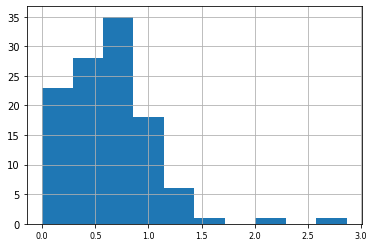

In [122]:
(abs(Nobitos_idade_taxa2['dif']-Nobitos_idade_taxa2['dif'].median())/mad).hist()

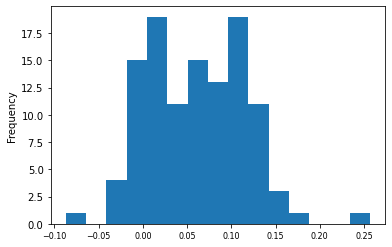

In [123]:
Nobitos_idade_taxa2['dif'].plot(kind='hist', bins=15)

Porém ela ainda não é uma distribuição normal, portento não poderemos usar o método do ttest

In [124]:
scipy.stats.shapiro(Nobitos_idade_taxa['dif'])

ShapiroResult(statistic=0.5118330717086792, pvalue=3.2126272240906004e-18)

In [125]:
scipy.stats.shapiro(Nobitos_idade_taxa2['dif'])

ShapiroResult(statistic=0.9687374830245972, pvalue=0.0094790393486619)

In [126]:
scipy.stats.wilcoxon(Nobitos_idade_taxa['n_vacinados'], Nobitos_idade_taxa['vacinados'], alternative='greater')

WilcoxonResult(statistic=6093.5, pvalue=2.0089550092612655e-12)

In [127]:
scipy.stats.wilcoxon(Nobitos_idade_taxa2['n_vacinados'], Nobitos_idade_taxa2['vacinados'], alternative='greater')

WilcoxonResult(statistic=5977.0, pvalue=1.568058489371111e-17)

Podemos observar nesses resultados que realmente a vacina tem um efeito positivo na chance de sobrevivência do paciente, além de que o pvalue é mais certo para a hipótese alternativa quando usamos os dados sem outliers

Continuamos a análise comparando a taxa de pessoas vacinadas e não vacinadas por idade

In [128]:
taxa_s = 100*taxa_s[12:]
taxa_n = 100*taxa_n[12:]

pd.merge(
    taxa_s,taxa_n,
    on = "NU_IDADE_N"
).rename(columns = {"N_pessoas_x":"vacinados"	, "N_pessoas_y":"n_vacinados"})

,vacinados,n_vacinados
NU_IDADE_N,,
12,NaN,1.637197
13,0.324675,2.012882
14,1.994302,2.251877
15,1.265823,3.244120
16,2.182540,4.948301
...,...,...
112,50.000000,66.666667
113,NaN,100.000000
114,42.857143,NaN


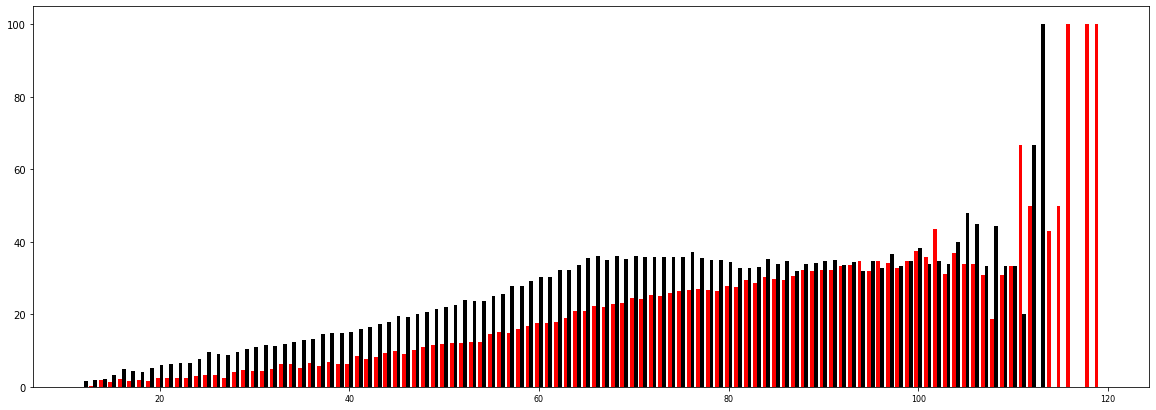

In [129]:
colors = ["red","black"]
offsets = [-0.2, 0.2]
distribuicoes = [taxa_s,taxa_n]

plt.figure(figsize =  (20,7))
for distribuicao ,offset,color in zip(distribuicoes,offsets,colors):
    plt.bar(
            np.arange(12,12+distribuicao.N_pessoas.size)+offset,
            distribuicao.N_pessoas,
            color = color,
            width=0.4
            )

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


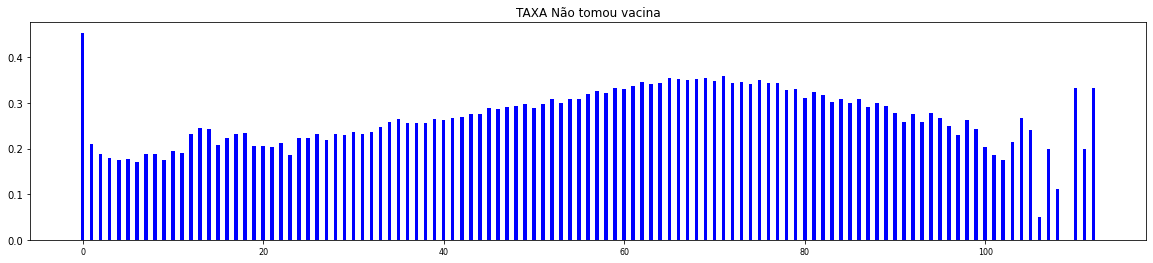

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


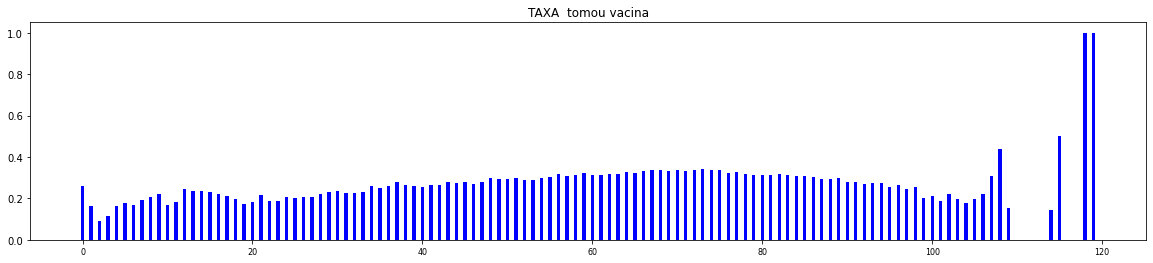

In [130]:
Npessoas_idade_pos_vacina_nao = df_pos_vacina[df_pos_vacina["VACINA_COV"]== 2][["NU_IDADE_N","DT_NOTIFIC"]].groupby(by = "NU_IDADE_N").count().rename(columns = {"DT_NOTIFIC": "N_pessoas"})
Npessoas_idade_pos_vacina     = df_pos_vacina[df_pos_vacina["VACINA_COV"]== 1][["NU_IDADE_N","DT_NOTIFIC"]].groupby(by = "NU_IDADE_N").count().rename(columns = {"DT_NOTIFIC": "N_pessoas"})
plot_por_idade(df_pos_vacina[df_pos_vacina["VACINA_COV"]== 2][df_pos_vacina["UTI"]== 1],Npessoas_idade_pos_vacina_nao,return_distributions=0,titulo = "Não tomou vacina",titulo_taxa = "Não tomou vacina",contagem = False)
plot_por_idade(df_pos_vacina[df_pos_vacina["VACINA_COV"]== 1][df_pos_vacina["UTI"]== 1],Npessoas_idade_pos_vacina,return_distributions=0,titulo = "tomou vacina"    ,titulo_taxa = " tomou vacina",contagem = 0)

In [131]:
del Npessoas_idade_pos_vacina_nao
del Npessoas_idade_pos_vacina    
del df_pos_vacina

Podemos agora analisar a data da última vacina que o indivíduo tomou

In [132]:
pd.to_datetime("01/02/2020",dayfirst = True) - pd.to_datetime("01/01/2020",dayfirst = True)

Timedelta('31 days 00:00:00')

In [133]:
df["ULT_DOSE"] = np.where(pd.isnull(df.DOSE_2_COV) == False ,df.DOSE_2_COV,df.DOSE_1_COV)
df["ULT_DOSE"] = np.where(pd.isnull( df.DOSE_REF ) == False , df.DOSE_REF , df.ULT_DOSE )
df[["ULT_DOSE","DOSE_1_COV","DOSE_2_COV","DOSE_REF"]]

,ULT_DOSE,DOSE_1_COV,DOSE_2_COV,DOSE_REF
0,NaT,NaT,NaT,NaT
2,NaT,NaT,NaT,NaT
3,NaT,NaT,NaT,NaT
4,NaT,NaT,NaT,NaT
5,NaT,NaT,NaT,NaT
...,...,...,...,...
3107768,2021-10-11,2021-07-19,2021-10-11,NaT
3107769,NaT,NaT,NaT,NaT
3107770,2021-11-24,2021-03-05,2021-06-02,2021-11-24
3107771,2021-04-23,2021-03-04,2021-04-23,NaT


In [134]:
df["TEMP_ULT_DOSE"] = np.where(   df.DT_SIN_PRI >= df.DOSE_REF                                     , df.DT_SIN_PRI - df.DOSE_REF  ,    pd.to_datetime(  np.NaN  )    )
df["TEMP_ULT_DOSE"] = np.where(  (df.DT_SIN_PRI >= df.DOSE_2_COV) & ( pd.isnull(df.TEMP_ULT_DOSE) ), df.DT_SIN_PRI - df.DOSE_2_COV, df.TEMP_ULT_DOSE )
df["TEMP_ULT_DOSE"] = np.where(  (df.DT_SIN_PRI >= df.DOSE_1_COV) & ( pd.isnull(df.TEMP_ULT_DOSE) ), df.DT_SIN_PRI - df.DOSE_1_COV, df.TEMP_ULT_DOSE )   

In [135]:
df.TEMP_ULT_DOSE = df.TEMP_ULT_DOSE/ 100000000000

In [136]:
((df.DT_SIN_PRI - df.DOSE_REF).dt.days >= 850).any()

False

In [137]:
df[["TEMP_ULT_DOSE","ULT_DOSE","DT_SIN_PRI","DOSE_1_COV","DOSE_2_COV","DOSE_REF"]]

,TEMP_ULT_DOSE,ULT_DOSE,DT_SIN_PRI,DOSE_1_COV,DOSE_2_COV,DOSE_REF
0,NaN,NaT,2020-01-07,NaT,NaT,NaT
2,NaN,NaT,2020-02-08,NaT,NaT,NaT
3,NaN,NaT,2020-01-26,NaT,NaT,NaT
4,NaN,NaT,2020-01-10,NaT,NaT,NaT
5,NaN,NaT,2020-02-24,NaT,NaT,NaT
...,...,...,...,...,...,...
3107768,103680.0,2021-10-11,2022-02-08,2021-07-19,2021-10-11,NaT
3107769,NaT,NaT,2022-02-15,NaT,NaT,NaT
3107770,73440.0,2021-11-24,2022-02-17,2021-03-05,2021-06-02,2021-11-24
3107771,251424.0,2021-04-23,2022-02-08,2021-03-04,2021-04-23,NaT


podemos observar que algumas pessoas tem dados incompletos ainda sobre as vacinas, portanto preencheremos como 9 (não informado)

In [138]:
df["VACINA"].unique()

array([ 2.,  9., nan,  1.])

In [139]:
df["VACINA"] = np.where(pd.isnull(df.VACINA),9,df.VACINA)

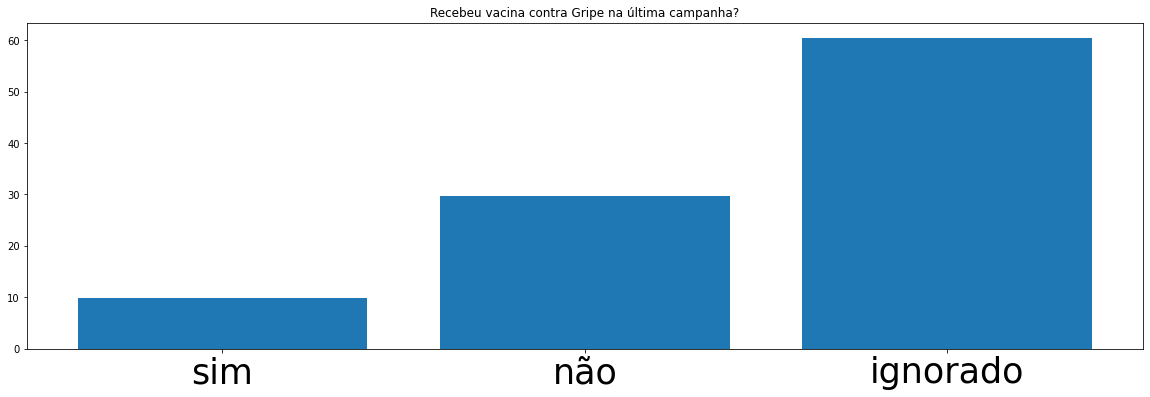

sim 9.95726339273131
não 29.659451671606867
ignorado 60.38328493566182


In [140]:
respostas = ["sim","não","ignorado"]
quantidades = 100*np.array([len(df[df["VACINA"] == 1])/len(df),len(df[df["VACINA"] == 2])/len(df),len(df[df["VACINA"] == 9])/len(df)])
plt.figure(figsize = (20,6))
plt.rc('xtick',labelsize=35)
plt.title("Recebeu vacina contra Gripe na última campanha?")
plt.bar(respostas,quantidades)
plt.show()
for resposta, qtd in zip(respostas,quantidades):
    print(resposta, qtd)

In [141]:
plt.rc('xtick',labelsize=17)

Observamos agora o resultado dos exames de todos os internados

influenza: 18930
outro vírus respiratório: 26126
outro agente etiológico: 9083
não especificado: 845332
covid-19: 1990285


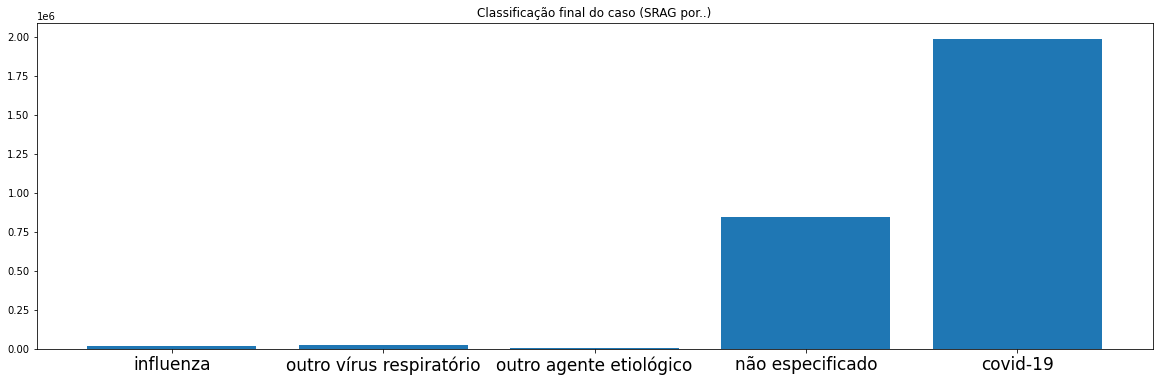

In [142]:
causas = [ "influenza",
"outro vírus respiratório",
"outro agente etiológico",
"não especificado",
"covid-19"]
quantidades = [len(df[df["CLASSI_FIN"] == 1]),
len(df[df["CLASSI_FIN"] == 2]) ,
len(df[df["CLASSI_FIN"] == 3]) ,
len(df[df["CLASSI_FIN"] == 4]) ,
len(df[df["CLASSI_FIN"] == 5]) 
]
plt.figure(figsize = (20,6))
plt.title("Classificação final do caso (SRAG por..)")
plt.bar(causas, quantidades)
for causa, quantidade in zip(causas,quantidades):
    print(f"{causa}: {quantidade}")

In [143]:
dist_por_doenca        = df[['DT_NOTIFIC','CLASSI_FIN']].groupby(by='CLASSI_FIN').count().rename(index = {1.0 : "influenza", 2.0 : "outro_vírus_respiratório",  3.0: "outro_agente_etiológico",  4.0: "não_especificado",  5.0:"covid-19"},columns = {"DT_NOTIFIC": "N_casos"})
dist_mortos_por_doenca = df[df.EVOLUCAO == 2][['DT_NOTIFIC','CLASSI_FIN']].groupby(by='CLASSI_FIN').count().rename(index = {1.0 : "influenza", 2.0 : "outro_vírus_respiratório",  3.0: "outro_agente_etiológico",  4.0: "não_especificado",  5.0:"covid-19"},columns = {"DT_NOTIFIC": "N_mortos"})
dist_uti_por_doenca    =  df[df.UTI == 2][['DT_NOTIFIC','CLASSI_FIN']].groupby(by='CLASSI_FIN').count().rename(index = {1.0 : "influenza", 2.0 : "outro_vírus_respiratório",  3.0: "outro_agente_etiológico",  4.0: "não_especificado",  5.0:"covid-19"},columns = {"DT_NOTIFIC": "UTI"})

df_por_doenca = pd.merge(
    dist_por_doenca,dist_mortos_por_doenca,
    on = "CLASSI_FIN"
)

df_por_doenca =  pd.merge(
    df_por_doenca,dist_uti_por_doenca,
    on = "CLASSI_FIN"
)

del dist_por_doenca
del dist_mortos_por_doenca
del dist_uti_por_doenca

df_por_doenca["taxa UTI"]     = df_por_doenca["UTI"]   /df_por_doenca["N_casos"] 
df_por_doenca["mortalidade"]  = df_por_doenca["N_mortos"]/df_por_doenca["N_casos"]
df_por_doenca["ocupação UTI"] = df_por_doenca["UTI"]/df_por_doenca["UTI"].sum()
df_por_doenca

,N_casos,N_mortos,UTI,taxa UTI,mortalidade,ocupação UTI
CLASSI_FIN,,,,,,
influenza,18930,2692,10113,0.534231,0.142208,0.006308
outro_vírus_respiratório,26126,988,17628,0.674730,0.037817,0.010995
outro_agente_etiológico,9083,1717,5098,0.561268,0.189034,0.003180
não_especificado,845332,137893,502245,0.594139,0.163123,0.313267
covid-19,1990285,626339,1068167,0.536690,0.314698,0.666251


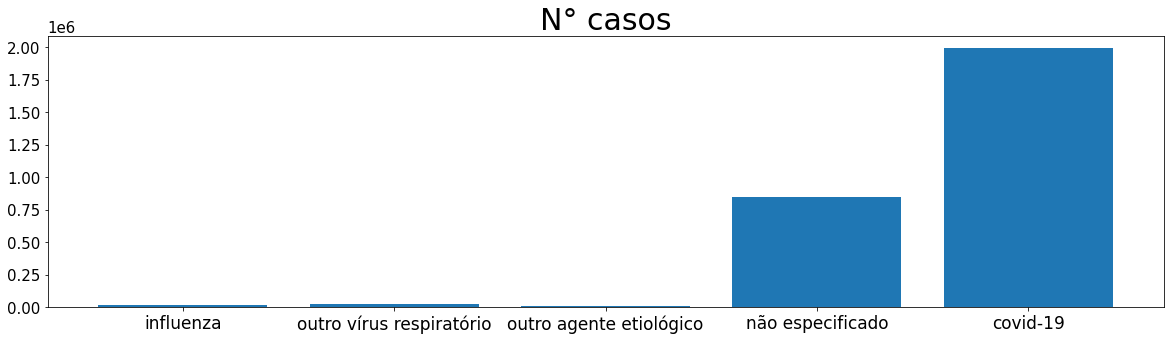

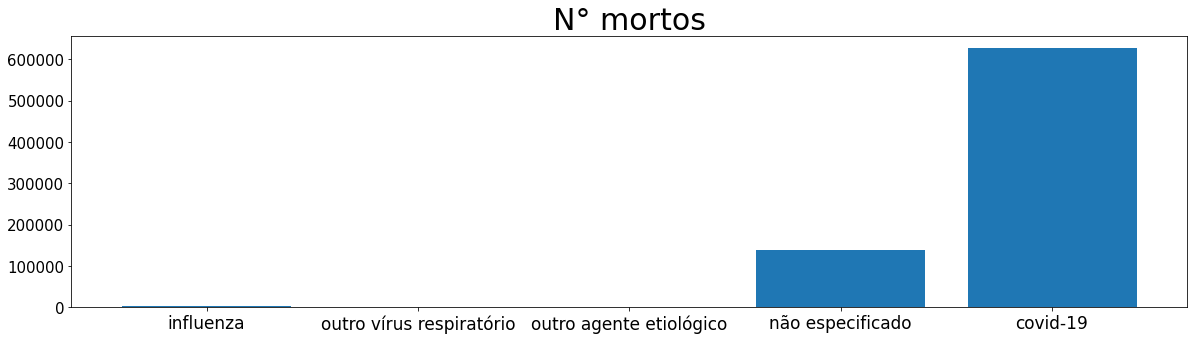

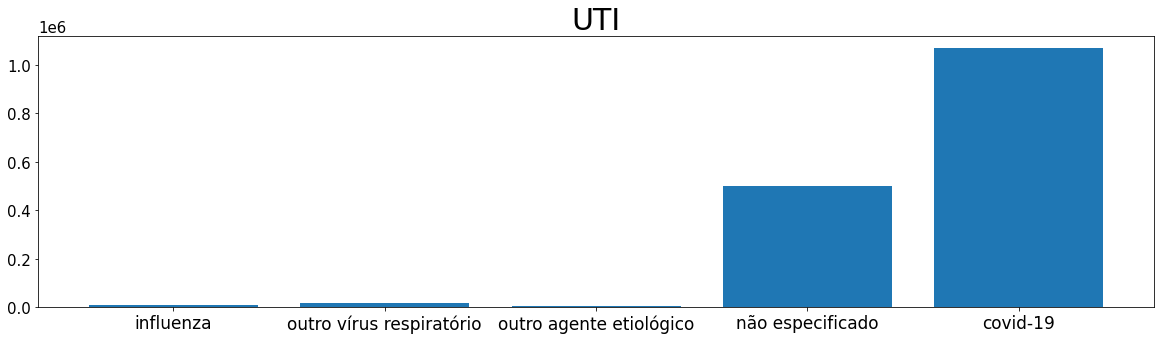

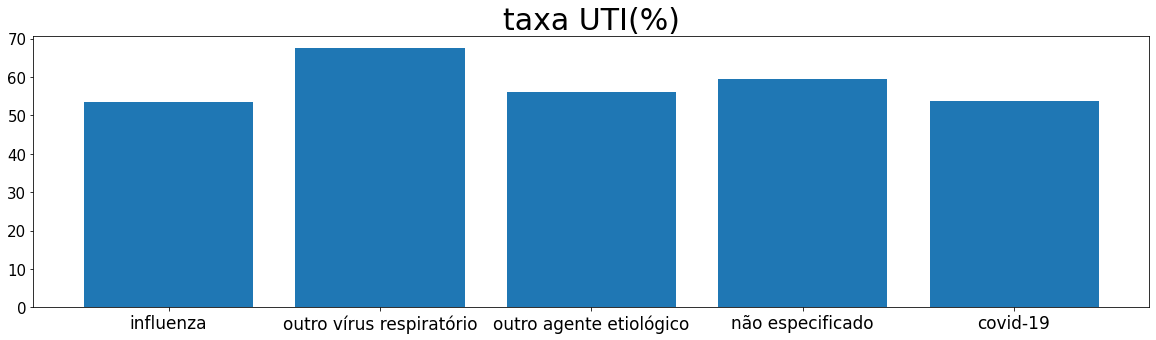

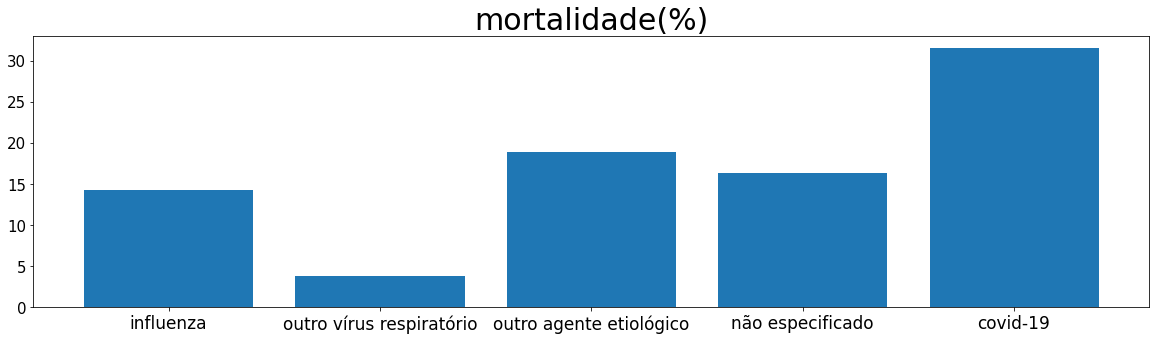

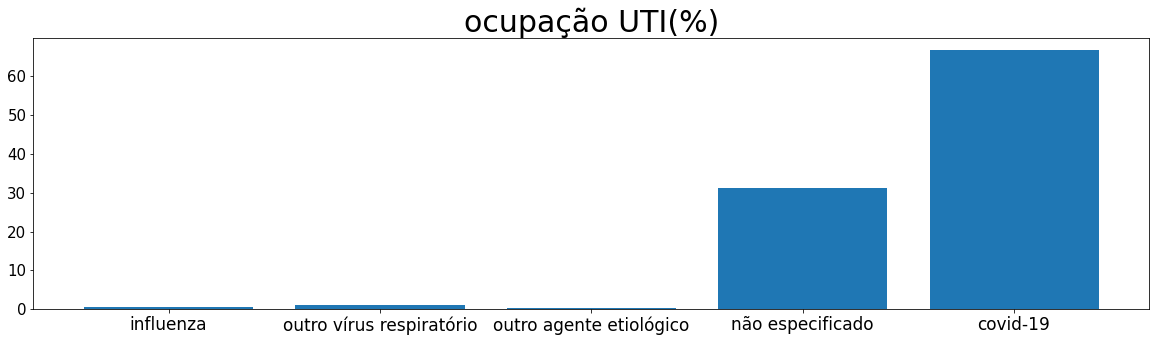

In [144]:
plt.rc('xtick',labelsize=17)
plt.rc('ytick',labelsize = 15)
for col in df_por_doenca.columns:
    series = df_por_doenca[col]
    if col in ["taxa UTI",	"mortalidade"	,"ocupação UTI"]: 
        series = 100*series
        col = col + "(%)"
    if "_" in col: 
        col = col.replace("_", "° ")
    plt.figure(figsize = (20,5))
    plt.title(col, fontsize=30)
    plt.bar(causas,series)
    
    plt.show()

Finalmente ajeitaremos a coluna de classificação final com os resultados de exames diversos para analisar se é covid ou não

In [145]:
df[ (df["TOMO_RES"] == 1) | (df["RES_IGM"] == 1) ][df["RES_AN"] == 1][((df["PCR_RESUL"] == 1) & (df["PCR_SARS2"] == 1))]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,NU_IDADE_N,FATOR_RISC,CARDIOPATI,ASMA,PNEUMOPATI,DIABETES,IMUNODEPRE,OBESIDADE,OBES_IMC,VACINA_COV,...,ANO_DT_SIN_PRI,DIA_PRI,DIA_NOT,ONDA,OBES_MORB,FATOR_RISC_GRAVE,COMORBIDADES,COMORBIDADE_GRAVE,ULT_DOSE,TEMP_ULT_DOSE
1580,69,1.0,1.0,2.0,2.0,1.0,2.0,2.0,NaN,2,...,2020,181,195,1.000000,9.0,1.0,1,1.0,NaT,NaN
1922,84,1.0,1.0,2.0,2.0,2.0,2.0,2.0,NaN,2,...,2020,194,207,1.000000,9.0,1.0,1,1.0,NaT,NaN
2972,88,1.0,1.0,2.0,2.0,2.0,2.0,2.0,NaN,2,...,2020,276,289,1.159091,9.0,1.0,1,1.0,NaT,NaN
3144,29,1.0,1.0,2.0,2.0,2.0,2.0,2.0,NaN,2,...,2020,282,286,1.295455,9.0,1.0,1,1.0,NaT,NaN
3839,73,1.0,2.0,2.0,2.0,1.0,2.0,2.0,NaN,2,...,2020,330,344,2.000000,9.0,1.0,1,1.0,NaT,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3107255,77,1.0,1.0,2.0,2.0,2.0,2.0,2.0,NaN,1,...,2022,792,797,5.000000,9.0,1.0,1,1.0,2021-11-17,90720.0
3107411,85,1.0,1.0,2.0,2.0,1.0,2.0,2.0,NaN,1,...,2022,743,755,5.000000,9.0,1.0,1,1.0,2021-04-02,246240.0
3107606,76,1.0,1.0,2.0,2.0,2.0,2.0,2.0,NaN,1,...,2022,763,778,5.000000,9.0,1.0,1,1.0,2021-10-27,83808.0
3107646,89,1.0,1.0,2.0,2.0,1.0,2.0,2.0,NaN,2,...,2022,786,793,5.000000,9.0,1.0,1,1.0,NaT,NaT


In [146]:
df["CLASSI_COV_EXAME"] = np.where((df["TOMO_RES"] == 1) | (df["RES_IGM"] == 1) |( (df["PCR_RESUL"] == 1) & (df["PCR_SARS2"] == 1)) , True,False)

In [147]:
classi_covid = df["CLASSI_FIN"]==5
exame_covid = df["CLASSI_COV_EXAME"]

Podemos observar agora a quantidade de casos onde houve exame e seus resultados 

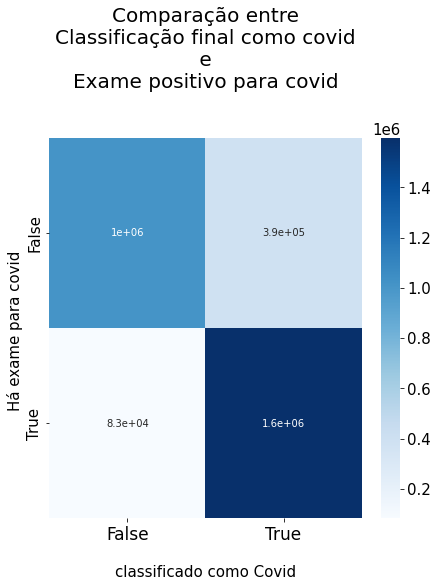

In [148]:
cf_matrix = confusion_matrix(exame_covid,classi_covid)

plt.figure(figsize = (7,7))
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')


ax.set_title('Comparação entre\nClassificação final como covid\n e \nExame positivo para covid\n\n',fontsize = 20);
ax.set_xlabel('\nclassificado como Covid',fontsize = 15)
ax.set_ylabel('Há exame para covid ',fontsize = 15);

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

# exportar base de dados para o drive

Como pode-se observar, mais de um terço dos dados foi ignorado ou é nan, para salvar os dados a serem classificados precisamos dropar essas colunas sem dados de evolução

In [149]:
df["CLASSI_FIN"].unique()

array([ 2.,  4., nan,  1.,  5.,  3.])

In [150]:
len(df["CLASSI_FIN"][(pd.isnull(df["CLASSI_FIN"])) | (df["CLASSI_FIN"] == 4)  ])/len(df["CLASSI_FIN"])

0.3376412282716702

In [151]:
df["EVOLUCAO"].unique()

array([1., 2., 9., 3.])

In [152]:
len(df["EVOLUCAO"][ (pd.isnull(df["EVOLUCAO"]))  | (df["EVOLUCAO"] == 9) ])/len(df["EVOLUCAO"])

0.1440561579300851

In [153]:
df [ (pd.isnull(df["EVOLUCAO"]))  |  (df["EVOLUCAO"] == 9 ) | (pd.isnull(df["CLASSI_FIN"])) | (df["CLASSI_FIN"] == 4)  ].shape[0]/len(df)

0.39035035853586864

In [154]:
df_a_ser_classificado = df [ (df["EVOLUCAO"] == 9 ) | (pd.isnull(df["CLASSI_FIN"])) | (df["CLASSI_FIN"] == 4)  ]
df.drop(df_a_ser_classificado.index,inplace = True)

limpamos alguns dados

In [155]:
del df_dt_erro      
del df_quarta_idade 
del df_erro_IMC     
del df_doses_janssen

Salvamos agora as bases com e sem classificação para usar no próximo projeto

In [156]:
Nobitos_idade_taxa.to_csv("Nobitos_idade_taxa.csv", index = True)
Nobitos_idade_taxa2.to_csv("Nobitos_idade_taxa2.csv", index = True)

In [157]:
df_a_ser_classificado.to_csv("sem_classe_base.csv", index = True)

In [158]:
df.to_csv("full_base.csv", index = True)